In [1]:
#1 Load data and select variables
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/PeterBiiiqy/MSDA7005-Project/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

In [2]:
df_new = df[["Age", "Height", "Weight", "CH2O", "FAF",
                 "FAVC", "SMOKE", "SCC",                    
                 "Gender", "CAEC", "CALC", "MTRANS",      
                 "NObeyesdad"]]

In [3]:
df_new.shape

(2111, 13)

In [4]:
df_new.columns

Index(['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'FAVC', 'SMOKE', 'SCC',
       'Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df_new.head(6)

Age  Height  Weight  CH2O  FAF FAVC SMOKE  SCC  Gender       CAEC  \
0  21.0    1.62    64.0   2.0  0.0   no    no   no  Female  Sometimes   
1  21.0    1.52    56.0   3.0  3.0   no   yes  yes  Female  Sometimes   
2  23.0    1.80    77.0   2.0  2.0   no    no   no    Male  Sometimes   
3  27.0    1.80    87.0   2.0  2.0   no    no   no    Male  Sometimes   
4  22.0    1.78    89.8   2.0  0.0   no    no   no    Male  Sometimes   
5  29.0    1.62    53.0   2.0  0.0  yes    no   no    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_Weight  
3  Frequently                Walking   Overweight_Level_I  
4   Sometimes  Public_Transportation  Overweight_Level_II  
5   Sometimes             Automobile        Normal_Weight

In [6]:
#2 Recoding the variables
# Recoding binary variables
cols_binary = ["FAVC", "SMOKE", "SCC"]

df_new = df_new.copy()
df_new[cols_binary] = df_new[cols_binary].replace({"yes": 1, "no": 0}).pipe(
    lambda x: x.where(x.isin([1, 0])))
df_new.head(6)

/var/folders/f3/7w2snt6x1jv80170lgq4zxmh0000gn/T/ipykernel_23397/45405471.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new[cols_binary] = df_new[cols_binary].replace({"yes": 1, "no": 0}).pipe(


Age  Height  Weight  CH2O  FAF  FAVC  SMOKE  SCC  Gender       CAEC  \
0  21.0    1.62    64.0   2.0  0.0     0      0    0  Female  Sometimes   
1  21.0    1.52    56.0   3.0  3.0     0      1    1  Female  Sometimes   
2  23.0    1.80    77.0   2.0  2.0     0      0    0    Male  Sometimes   
3  27.0    1.80    87.0   2.0  2.0     0      0    0    Male  Sometimes   
4  22.0    1.78    89.8   2.0  0.0     0      0    0    Male  Sometimes   
5  29.0    1.62    53.0   2.0  0.0     1      0    0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_Weight  
3  Frequently                Walking   Overweight_Level_I  
4   Sometimes  Public_Transportation  Overweight_Level_II  
5   Sometimes             Automobile        Normal_Weight

In [7]:
# Transfrom some numeric variables to categorical variable
cols_to_category = ["CH2O", "FAF"]

df_new[cols_to_category] = df_new[cols_to_category].round().astype("int").astype("category")
df_new.head(6)

Age  Height  Weight CH2O FAF  FAVC  SMOKE  SCC  Gender       CAEC  \
0  21.0    1.62    64.0    2   0     0      0    0  Female  Sometimes   
1  21.0    1.52    56.0    3   3     0      1    1  Female  Sometimes   
2  23.0    1.80    77.0    2   2     0      0    0    Male  Sometimes   
3  27.0    1.80    87.0    2   2     0      0    0    Male  Sometimes   
4  22.0    1.78    89.8    2   0     0      0    0    Male  Sometimes   
5  29.0    1.62    53.0    2   0     1      0    0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_Weight  
3  Frequently                Walking   Overweight_Level_I  
4   Sometimes  Public_Transportation  Overweight_Level_II  
5   Sometimes             Automobile        Normal_Weight

In [8]:
# Transform strings into categories
cols_str = df_new.select_dtypes(include="object").columns
df_new[cols_str] = df_new[cols_str].astype("category")
df_new.dtypes

Age            float64
Height         float64
Weight         float64
CH2O          category
FAF           category
FAVC             int64
SMOKE            int64
SCC              int64
Gender        category
CAEC          category
CALC          category
MTRANS        category
NObeyesdad    category
dtype: object

In [9]:
# Provide standard order on categorical variables
df_new["NObeyesdad"] = pd.Categorical(df_new["NObeyesdad"], categories=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"], ordered=True)
df_new["CAEC"] = pd.Categorical(df_new["CAEC"], categories=["no","Sometimes","Frequently","Always"], ordered=True)
df_new["CALC"] = pd.Categorical(df_new["CALC"], categories=["no","Sometimes","Frequently","Always"], ordered=True)
df_new["MTRANS"] = pd.Categorical(df_new["MTRANS"], categories=["Automobile","Motorbike","Public_Transportation","Bike","Walking"], ordered=True)
df_new["CH2O"] = pd.Categorical(df_new["CH2O"].round().astype(int), categories=sorted(df_new["CH2O"].round().astype(int).unique()), ordered=True)
df_new["FAF"] = pd.Categorical(df_new["FAF"].round().astype(int), categories=sorted(df_new["FAF"].round().astype(int).unique()), ordered=True)
for col in ["FAVC","SMOKE","SCC"]: df_new[col] = pd.Categorical(df_new[col], categories=[0, 1], ordered=True)
df_new.head(6)

Age  Height  Weight CH2O FAF FAVC SMOKE SCC  Gender       CAEC  \
0  21.0    1.62    64.0    2   0    0     0   0  Female  Sometimes   
1  21.0    1.52    56.0    3   3    0     1   1  Female  Sometimes   
2  23.0    1.80    77.0    2   2    0     0   0    Male  Sometimes   
3  27.0    1.80    87.0    2   2    0     0   0    Male  Sometimes   
4  22.0    1.78    89.8    2   0    0     0   0    Male  Sometimes   
5  29.0    1.62    53.0    2   0    1     0   0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_Weight  
3  Frequently                Walking   Overweight_Level_I  
4   Sometimes  Public_Transportation  Overweight_Level_II  
5   Sometimes             Automobile        Normal_Weight

In [10]:
# Provide standard order on categorical variables
df_new["NObeyesdad"] = pd.Categorical(df_new["NObeyesdad"], categories=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"], ordered=True)
df_new["CAEC"] = pd.Categorical(df_new["CAEC"], categories=["no","Sometimes","Frequently","Always"], ordered=True)
df_new["CALC"] = pd.Categorical(df_new["CALC"], categories=["no","Sometimes","Frequently","Always"], ordered=True)
df_new["MTRANS"] = pd.Categorical(df_new["MTRANS"], categories=["Automobile","Motorbike","Public_Transportation","Bike","Walking"], ordered=True)
df_new["CH2O"] = pd.Categorical(df_new["CH2O"].round().astype(int), categories=sorted(df_new["CH2O"].round().astype(int).unique()), ordered=True)
df_new["FAF"] = pd.Categorical(df_new["FAF"].round().astype(int), categories=sorted(df_new["FAF"].round().astype(int).unique()), ordered=True)
for col in ["FAVC","SMOKE","SCC"]: df_new[col] = pd.Categorical(df_new[col], categories=[0, 1], ordered=True)
df_new.head(6)

Age  Height  Weight CH2O FAF FAVC SMOKE SCC  Gender       CAEC  \
0  21.0    1.62    64.0    2   0    0     0   0  Female  Sometimes   
1  21.0    1.52    56.0    3   3    0     1   1  Female  Sometimes   
2  23.0    1.80    77.0    2   2    0     0   0    Male  Sometimes   
3  27.0    1.80    87.0    2   2    0     0   0    Male  Sometimes   
4  22.0    1.78    89.8    2   0    0     0   0    Male  Sometimes   
5  29.0    1.62    53.0    2   0    1     0   0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_Weight  
3  Frequently                Walking   Overweight_Level_I  
4   Sometimes  Public_Transportation  Overweight_Level_II  
5   Sometimes             Automobile        Normal_Weight

In [11]:
# Perform Z-score standardization for numeric variables
cols_numeric = ["Age", "Height", "Weight"]
for col in cols_numeric:
    df_new[f"{col}_std"] = ((df_new[col] - df_new[col].mean()) 
                            / df_new[col].std()).round(4)

df_new.head(6)

Age  Height  Weight CH2O FAF FAVC SMOKE SCC  Gender       CAEC  \
0  21.0    1.62    64.0    2   0    0     0   0  Female  Sometimes   
1  21.0    1.52    56.0    3   3    0     1   1  Female  Sometimes   
2  23.0    1.80    77.0    2   2    0     0   0    Male  Sometimes   
3  27.0    1.80    87.0    2   2    0     0   0    Male  Sometimes   
4  22.0    1.78    89.8    2   0    0     0   0    Male  Sometimes   
5  29.0    1.62    53.0    2   0    1     0   0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  Age_std  \
0          no  Public_Transportation        Normal_Weight  -0.5220   
1   Sometimes  Public_Transportation        Normal_Weight  -0.5220   
2  Frequently  Public_Transportation        Normal_Weight  -0.2068   
3  Frequently                Walking   Overweight_Level_I   0.4235   
4   Sometimes  Public_Transportation  Overweight_Level_II  -0.3644   
5   Sometimes             Automobile        Normal_Weight   0.7386   

   Height_std  Weight_std  
0     -0.8754     -0.8624  
1     -1.9471     -1.1678  
2      1.0538     -0.3660  
3      1.0538      0.0158  
4      0.8394      0.1227  
5     -0.8754     -1.2823

In [12]:
# Create dummy variables for multi-category 
df_ordered = df_new.copy()
cols_categorical = ["Gender", "CAEC", "CALC", "MTRANS", "CH2O", "FAF"]
df_new = pd.get_dummies(df_new, columns=cols_categorical, 
                        drop_first=False, dtype=int)
df_new.head(6)

Age  Height  Weight FAVC SMOKE SCC           NObeyesdad  Age_std  \
0  21.0    1.62    64.0    0     0   0        Normal_Weight  -0.5220   
1  21.0    1.52    56.0    0     1   1        Normal_Weight  -0.5220   
2  23.0    1.80    77.0    0     0   0        Normal_Weight  -0.2068   
3  27.0    1.80    87.0    0     0   0   Overweight_Level_I   0.4235   
4  22.0    1.78    89.8    0     0   0  Overweight_Level_II  -0.3644   
5  29.0    1.62    53.0    1     0   0        Normal_Weight   0.7386   

   Height_std  Weight_std  ...  MTRANS_Public_Transportation  MTRANS_Bike  \
0     -0.8754     -0.8624  ...                             1            0   
1     -1.9471     -1.1678  ...                             1            0   
2      1.0538     -0.3660  ...                             1            0   
3      1.0538      0.0158  ...                             0            0   
4      0.8394      0.1227  ...                             1            0   
5     -0.8754     -1.2823  ...                             0            0   

   MTRANS_Walking  CH2O_1  CH2O_2  CH2O_3  FAF_0  FAF_1  FAF_2  FAF_3  
0               0       0       1       0      1      0      0      0  
1               0       0       0       1      0      0      0      1  
2               0       0       1       0      0      0      1      0  
3               1       0       1       0      0      0      1      0  
4               0       0       1       0      1      0      0      0  
5               0       0       1       0      1      0      0      0  

[6 rows x 32 columns]

In [13]:
# Drop duplicates and check the dimensions
df_new.shape
df_new = df_new.drop_duplicates().reset_index(drop = True)
df_new.shape

(2087, 32)

In [14]:
# Drop duplicates and check the dimensions
df_ordered.shape
df_ordered = df_ordered.drop_duplicates().reset_index(drop = True)
df_ordered.shape

(2087, 16)

In [15]:
# Look for any missing values
df_new[df_new.isnull().any(axis=1)]

Empty DataFrame
Columns: [Age, Height, Weight, FAVC, SMOKE, SCC, NObeyesdad, Age_std, Height_std, Weight_std, Gender_Female, Gender_Male, CAEC_no, CAEC_Sometimes, CAEC_Frequently, CAEC_Always, CALC_no, CALC_Sometimes, CALC_Frequently, CALC_Always, MTRANS_Automobile, MTRANS_Motorbike, MTRANS_Public_Transportation, MTRANS_Bike, MTRANS_Walking, CH2O_1, CH2O_2, CH2O_3, FAF_0, FAF_1, FAF_2, FAF_3]
Index: []

[0 rows x 32 columns]

In [16]:
df_ordered.head(6)

Age  Height  Weight CH2O FAF FAVC SMOKE SCC  Gender       CAEC  \
0  21.0    1.62    64.0    2   0    0     0   0  Female  Sometimes   
1  21.0    1.52    56.0    3   3    0     1   1  Female  Sometimes   
2  23.0    1.80    77.0    2   2    0     0   0    Male  Sometimes   
3  27.0    1.80    87.0    2   2    0     0   0    Male  Sometimes   
4  22.0    1.78    89.8    2   0    0     0   0    Male  Sometimes   
5  29.0    1.62    53.0    2   0    1     0   0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  Age_std  \
0          no  Public_Transportation        Normal_Weight  -0.5220   
1   Sometimes  Public_Transportation        Normal_Weight  -0.5220   
2  Frequently  Public_Transportation        Normal_Weight  -0.2068   
3  Frequently                Walking   Overweight_Level_I   0.4235   
4   Sometimes  Public_Transportation  Overweight_Level_II  -0.3644   
5   Sometimes             Automobile        Normal_Weight   0.7386   

   Height_std  Weight_std  
0     -0.8754     -0.8624  
1     -1.9471     -1.1678  
2      1.0538     -0.3660  
3      1.0538      0.0158  
4      0.8394      0.1227  
5     -0.8754     -1.2823

In [17]:
df_ordered.head(6)

Age  Height  Weight CH2O FAF FAVC SMOKE SCC  Gender       CAEC  \
0  21.0    1.62    64.0    2   0    0     0   0  Female  Sometimes   
1  21.0    1.52    56.0    3   3    0     1   1  Female  Sometimes   
2  23.0    1.80    77.0    2   2    0     0   0    Male  Sometimes   
3  27.0    1.80    87.0    2   2    0     0   0    Male  Sometimes   
4  22.0    1.78    89.8    2   0    0     0   0    Male  Sometimes   
5  29.0    1.62    53.0    2   0    1     0   0    Male  Sometimes   

         CALC                 MTRANS           NObeyesdad  Age_std  \
0          no  Public_Transportation        Normal_Weight  -0.5220   
1   Sometimes  Public_Transportation        Normal_Weight  -0.5220   
2  Frequently  Public_Transportation        Normal_Weight  -0.2068   
3  Frequently                Walking   Overweight_Level_I   0.4235   
4   Sometimes  Public_Transportation  Overweight_Level_II  -0.3644   
5   Sometimes             Automobile        Normal_Weight   0.7386   

   Height_std  Weight_std  
0     -0.8754     -0.8624  
1     -1.9471     -1.1678  
2      1.0538     -0.3660  
3      1.0538      0.0158  
4      0.8394      0.1227  
5     -0.8754     -1.2823

In [18]:
df_new.to_csv("df_new.csv", index=False)
df_ordered.to_csv("df_ordered.csv", index=False)

In [19]:
#3 Descriptive Analysis
outcome_distribution = df_new.groupby(["NObeyesdad"])["Age"].agg(["count"])
outcome_distribution["Percentage"] = (outcome_distribution['count'] 
                                      / outcome_distribution['count'].sum() * 100).round(2).astype(str) + '%'
outcome_distribution

/var/folders/f3/7w2snt6x1jv80170lgq4zxmh0000gn/T/ipykernel_23397/1901243035.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_distribution = df_new.groupby(["NObeyesdad"])["Age"].agg(["count"])


count Percentage
NObeyesdad                           
Insufficient_Weight    267     12.79%
Normal_Weight          282     13.51%
Overweight_Level_I     276     13.22%
Overweight_Level_II    290      13.9%
Obesity_Type_I         351     16.82%
Obesity_Type_II        297     14.23%
Obesity_Type_III       324     15.52%

/var/folders/f3/7w2snt6x1jv80170lgq4zxmh0000gn/T/ipykernel_23397/1135545064.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


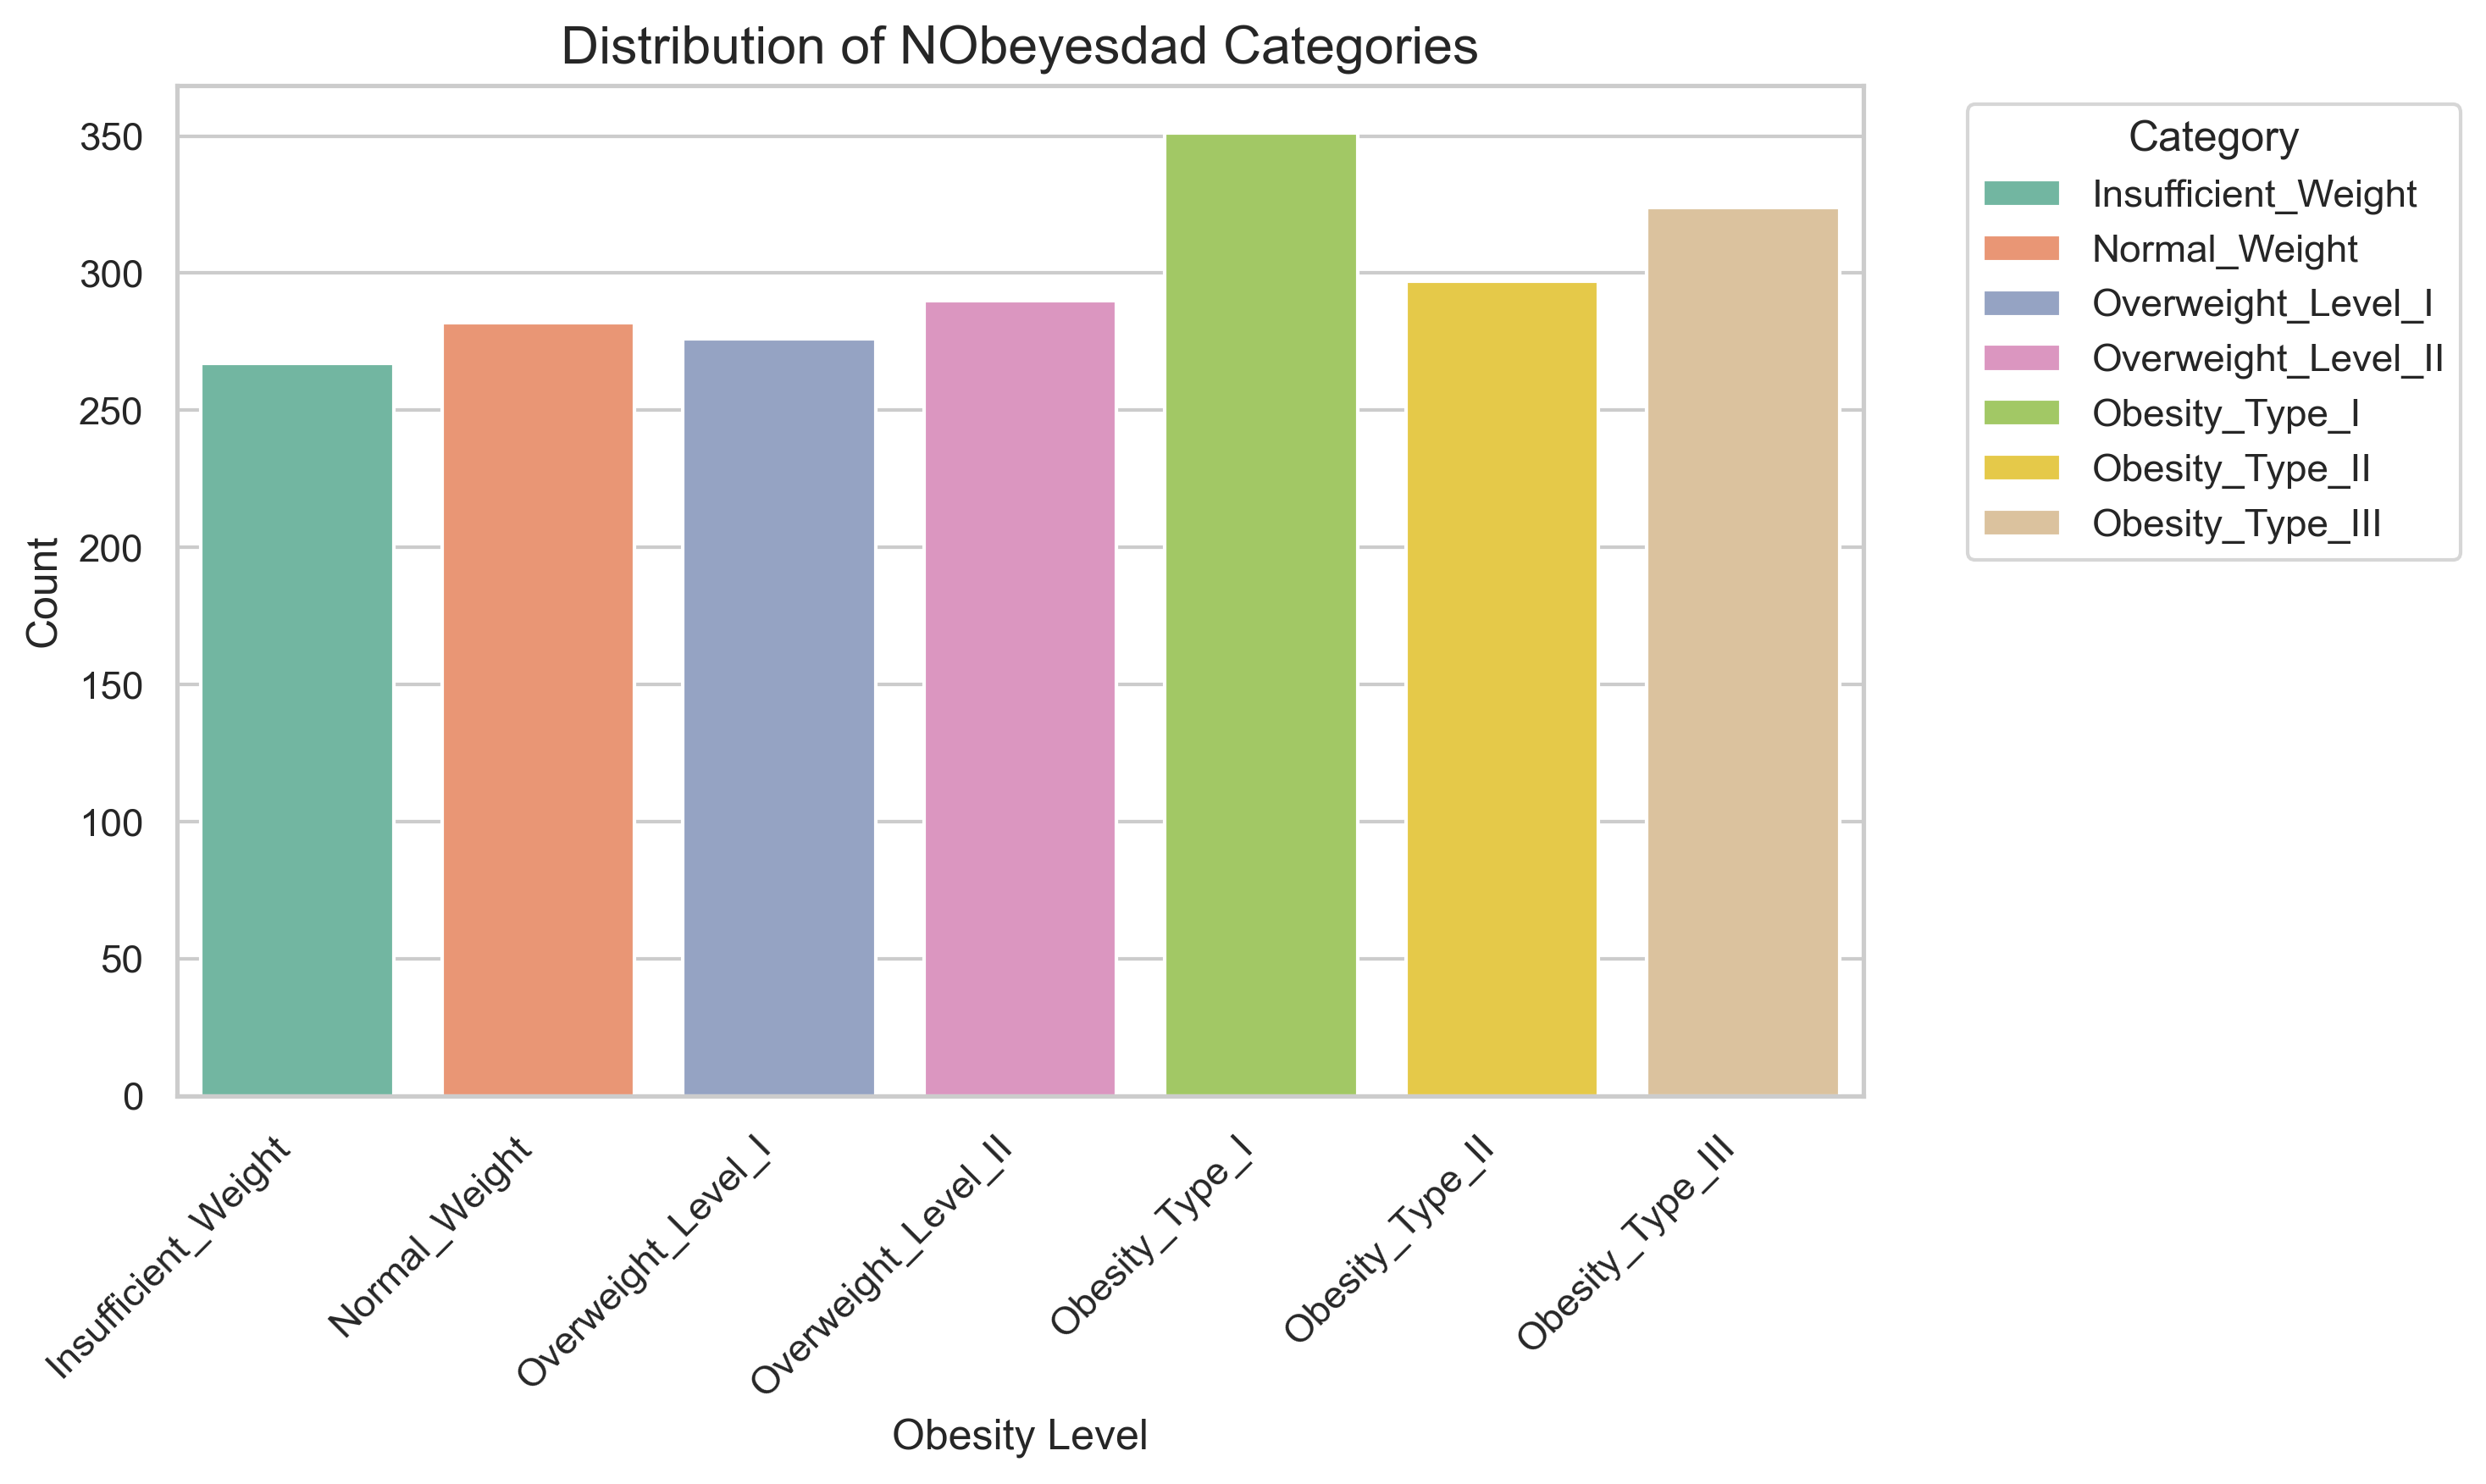

In [20]:
# Create bar chart for outcome variable distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6), dpi=300)
bars = sns.barplot(
    x=outcome_distribution.index,
    y=outcome_distribution["count"],
    palette="Set2"
)
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.title("Distribution of NObeyesdad Categories", fontsize=15)
plt.xticks(rotation=45, ha='right')

for bar, label in zip(bars.patches, outcome_distribution.index):
    bar.set_label(label)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("NObeyesdad_distribution.jpg", format="jpg", dpi=300) 
plt.show()

In [21]:
# Create summary table for dataframe
def tbl_summary(df):
    rows = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            desc = df[col].describe()
            rows.append({
                "Variable": col,
                "Type": "Numeric",
                "Count": desc["count"],
                "Mean": desc["mean"],
                "Std": desc["std"],
                "Min": desc["min"],
                "25%": desc["25%"],
                "50%": desc["50%"],
                "75%": desc["75%"],
                "Max": desc["max"]
            })
        else:
            counts = df[col].value_counts()
            percents = df[col].value_counts(normalize=True) * 100
            for lvl in counts.index:
                rows.append({
                    "Variable": col,
                    "Type": "Categorical",
                    "Level": lvl,
                    "Count": counts[lvl],
                    "Percentage": f"{percents[lvl]:.2f}%"
                })
    return pd.DataFrame(rows)

summary_table = tbl_summary(df_ordered)
summary_table

Variable         Type   Count       Mean        Std      Min        25%  \
0          Age      Numeric  2087.0  24.353090   6.368801  14.0000  19.915937   
1       Height      Numeric  2087.0   1.702674   0.093186   1.4500   1.630178   
2       Weight      Numeric  2087.0  86.858730  26.190847  39.0000  66.000000   
3         CH2O  Categorical  1107.0        NaN        NaN      NaN        NaN   
4         CH2O  Categorical   502.0        NaN        NaN      NaN        NaN   
5         CH2O  Categorical   478.0        NaN        NaN      NaN        NaN   
6          FAF  Categorical   759.0        NaN        NaN      NaN        NaN   
7          FAF  Categorical   714.0        NaN        NaN      NaN        NaN   
8          FAF  Categorical   495.0        NaN        NaN      NaN        NaN   
9          FAF  Categorical   119.0        NaN        NaN      NaN        NaN   
10        FAVC  Categorical  1844.0        NaN        NaN      NaN        NaN   
11        FAVC  Categorical   243.0        NaN        NaN      NaN        NaN   
12       SMOKE  Categorical  2043.0        NaN        NaN      NaN        NaN   
13       SMOKE  Categorical    44.0        NaN        NaN      NaN        NaN   
14         SCC  Categorical  1991.0        NaN        NaN      NaN        NaN   
15         SCC  Categorical    96.0        NaN        NaN      NaN        NaN   
16      Gender  Categorical  1052.0        NaN        NaN      NaN        NaN   
17      Gender  Categorical  1035.0        NaN        NaN      NaN        NaN   
18        CAEC  Categorical  1761.0        NaN        NaN      NaN        NaN   
19        CAEC  Categorical   236.0        NaN        NaN      NaN        NaN   
20        CAEC  Categorical    53.0        NaN        NaN      NaN        NaN   
21        CAEC  Categorical    37.0        NaN        NaN      NaN        NaN   
22        CALC  Categorical  1380.0        NaN        NaN      NaN        NaN   
23        CALC  Categorical   636.0        NaN        NaN      NaN        NaN   
24        CALC  Categorical    70.0        NaN        NaN      NaN        NaN   
25        CALC  Categorical     1.0        NaN        NaN      NaN        NaN   
26      MTRANS  Categorical  1558.0        NaN        NaN      NaN        NaN   
27      MTRANS  Categorical   456.0        NaN        NaN      NaN        NaN   
28      MTRANS  Categorical    55.0        NaN        NaN      NaN        NaN   
29      MTRANS  Categorical    11.0        NaN        NaN      NaN        NaN   
30      MTRANS  Categorical     7.0        NaN        NaN      NaN        NaN   
31  NObeyesdad  Categorical   351.0        NaN        NaN      NaN        NaN   
32  NObeyesdad  Categorical   324.0        NaN        NaN      NaN        NaN   
33  NObeyesdad  Categorical   297.0        NaN        NaN      NaN        NaN   
34  NObeyesdad  Categorical   290.0        NaN        NaN      NaN        NaN   
35  NObeyesdad  Categorical   282.0        NaN        NaN      NaN        NaN   
36  NObeyesdad  Categorical   276.0        NaN        NaN      NaN        NaN   
37  NObeyesdad  Categorical   267.0        NaN        NaN      NaN        NaN   
38     Age_std      Numeric  2087.0   0.006383   1.003594  -1.6251  -0.692850   
39  Height_std      Numeric  2087.0   0.010683   0.998726  -2.6974  -0.766300   
40  Weight_std      Numeric  2087.0   0.010409   0.999990  -1.8169  -0.786000   

          50%         75%       Max                  Level Percentage  
0   22.847618   26.000000   61.0000                    NaN        NaN  
1    1.701584    1.769491    1.9800                    NaN        NaN  
2   83.101100  108.015907  173.0000                    NaN        NaN  
3         NaN         NaN       NaN                      2     53.04%  
4         NaN         NaN       NaN                      3     24.05%  
5         NaN         NaN       NaN                      1     22.90%  
6         NaN         NaN       NaN                      1     36.37%  
7         NaN         NaN  

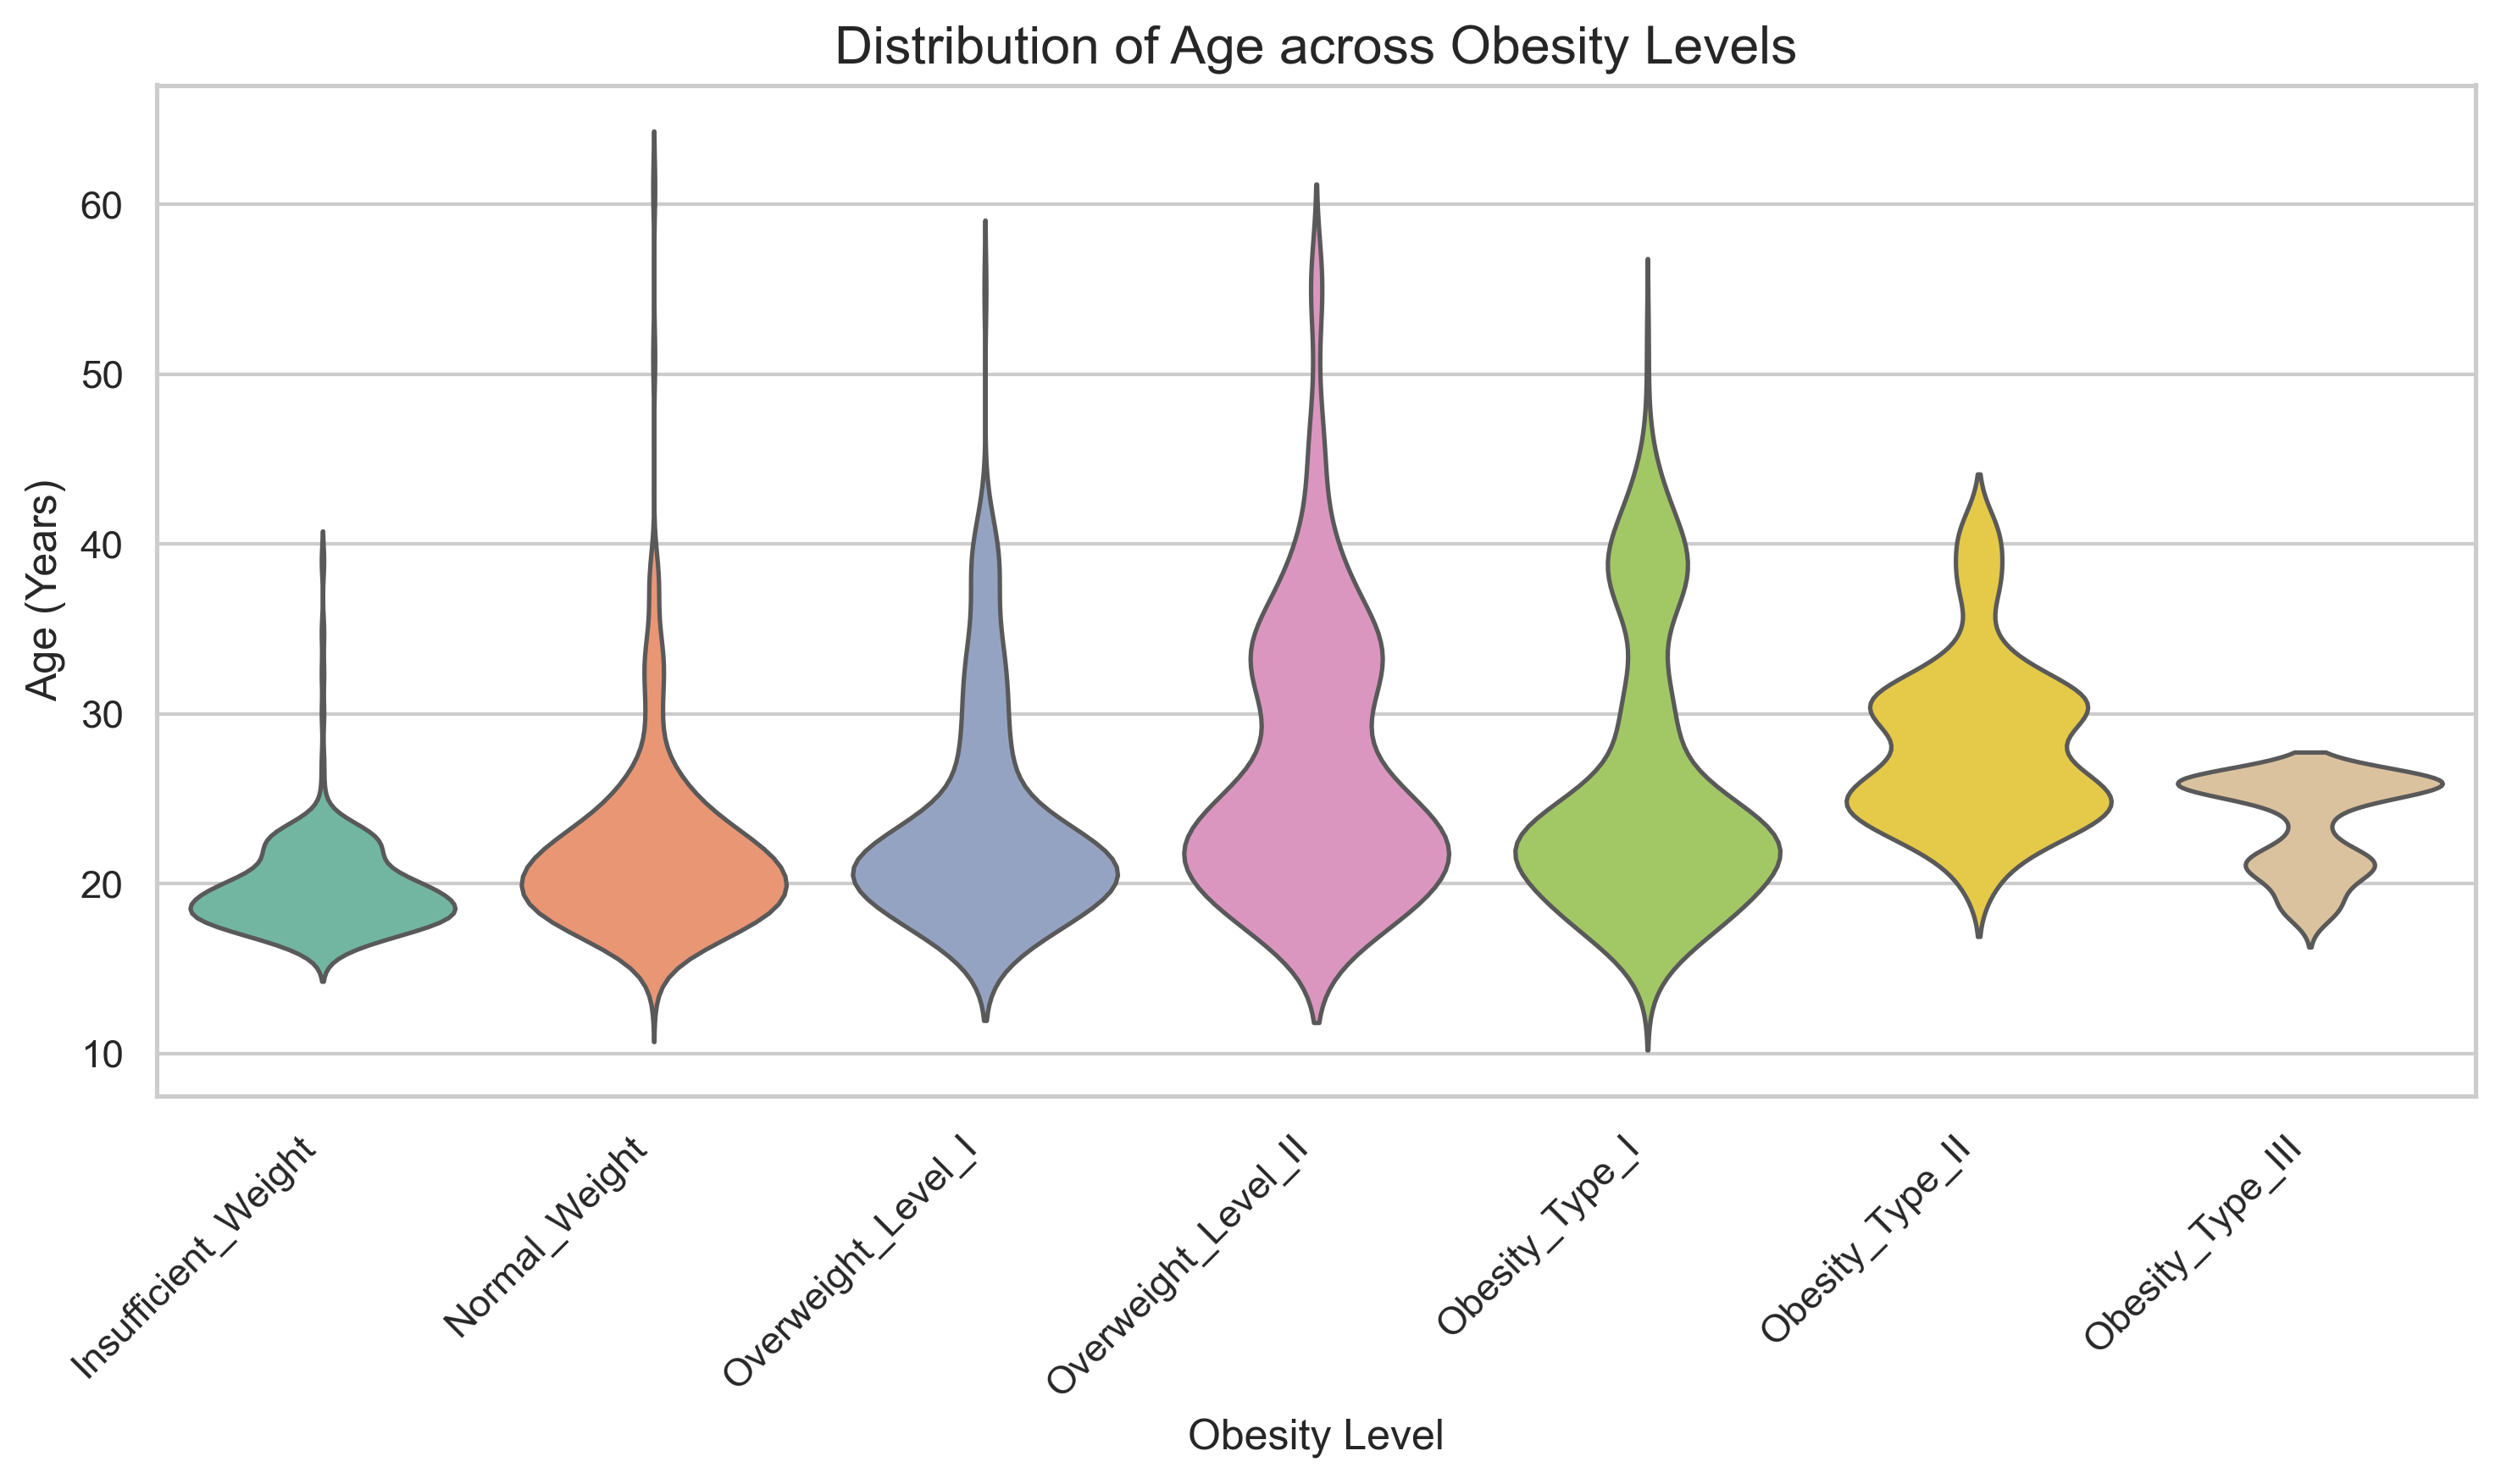

In [22]:
# Simple violin plot for Age
sns.set(style="whitegrid")

plt.figure(figsize=(10,6), dpi=300)

sns.violinplot(
    x="NObeyesdad", y="Age", data=df_ordered,
    palette="Set2", inner=None, hue="NObeyesdad", 
    dodge=False)

plt.title("Distribution of Age across Obesity Levels", fontsize=15)
plt.xlabel("Obesity Level")
plt.ylabel("Age (Years)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Distribution of Age across Obesity Levels.jpg", format="jpg", dpi=300) 
plt.show()

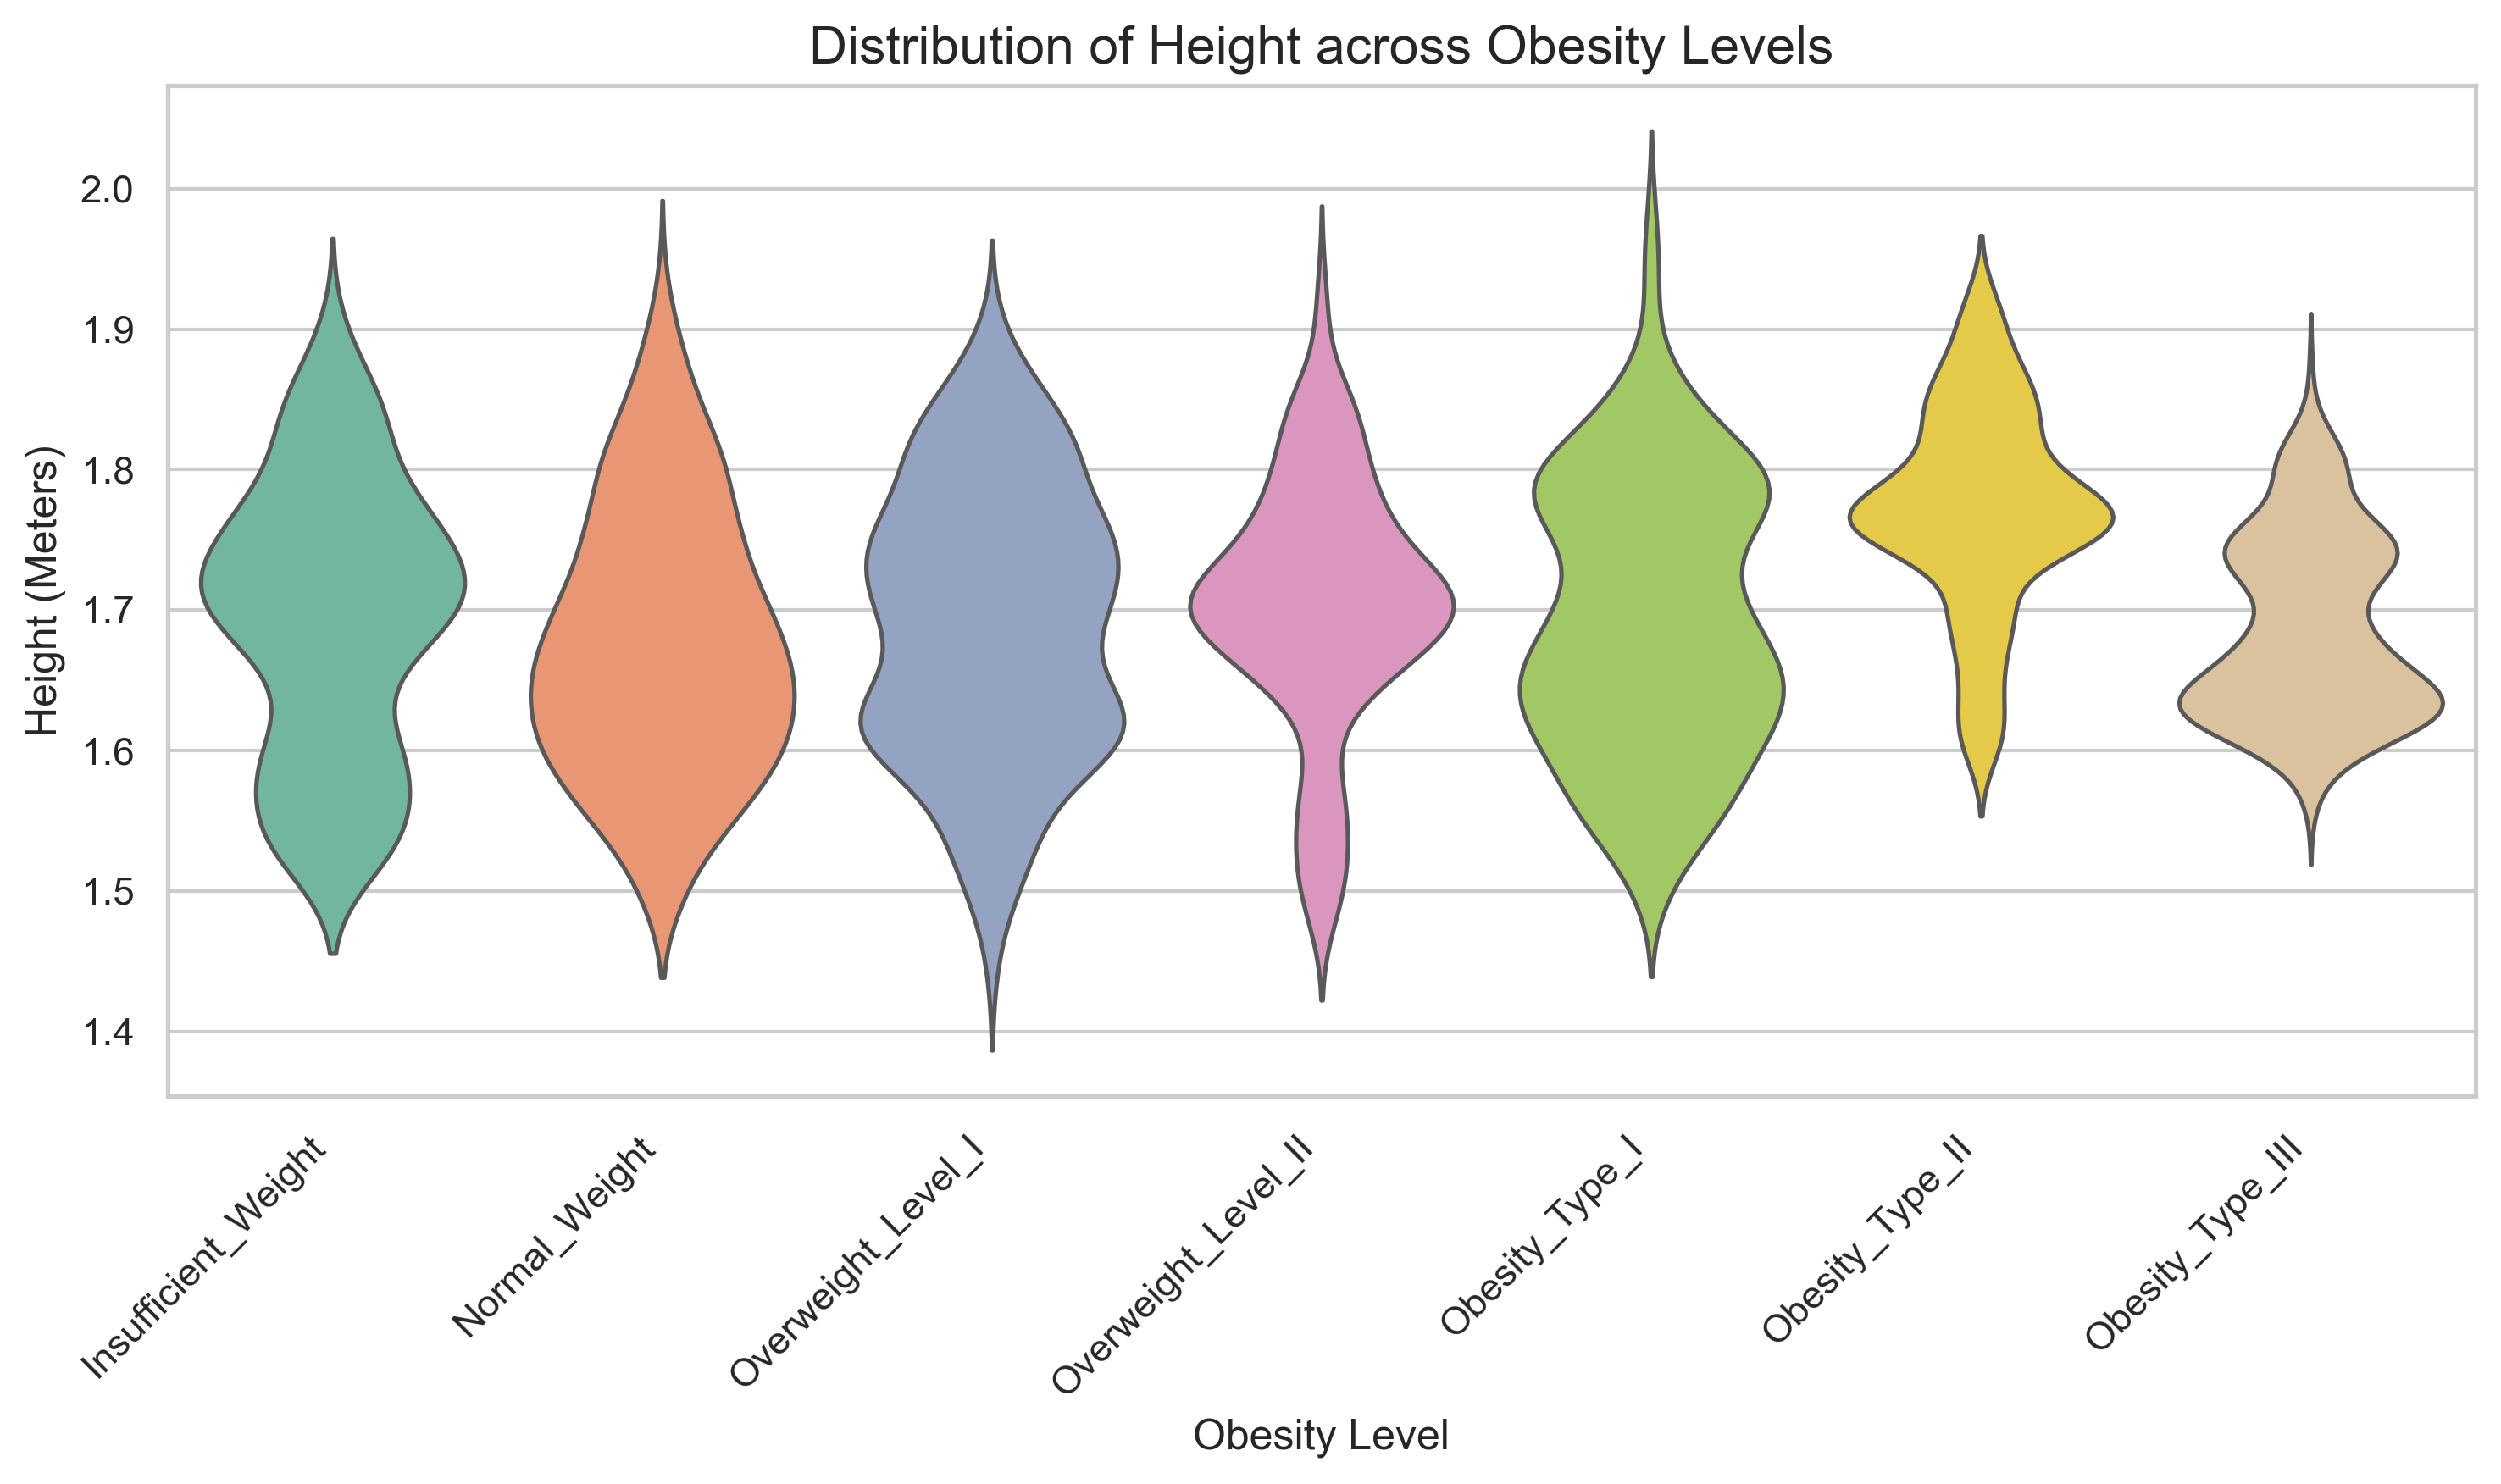

In [23]:
# Simple violin plot for Height
sns.set(style="whitegrid")

plt.figure(figsize=(10,6), dpi=300)

sns.violinplot(
    x="NObeyesdad",
    y="Height",
    data=df_ordered,
    palette="Set2",
    inner=None,
    hue="NObeyesdad",
    dodge=False 
)

plt.title("Distribution of Height across Obesity Levels", fontsize=15)
plt.xlabel("Obesity Level")
plt.ylabel("Height (Meters)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Distribution of Height across Obesity Levels.jpg", format="jpg", dpi=300) 
plt.show()

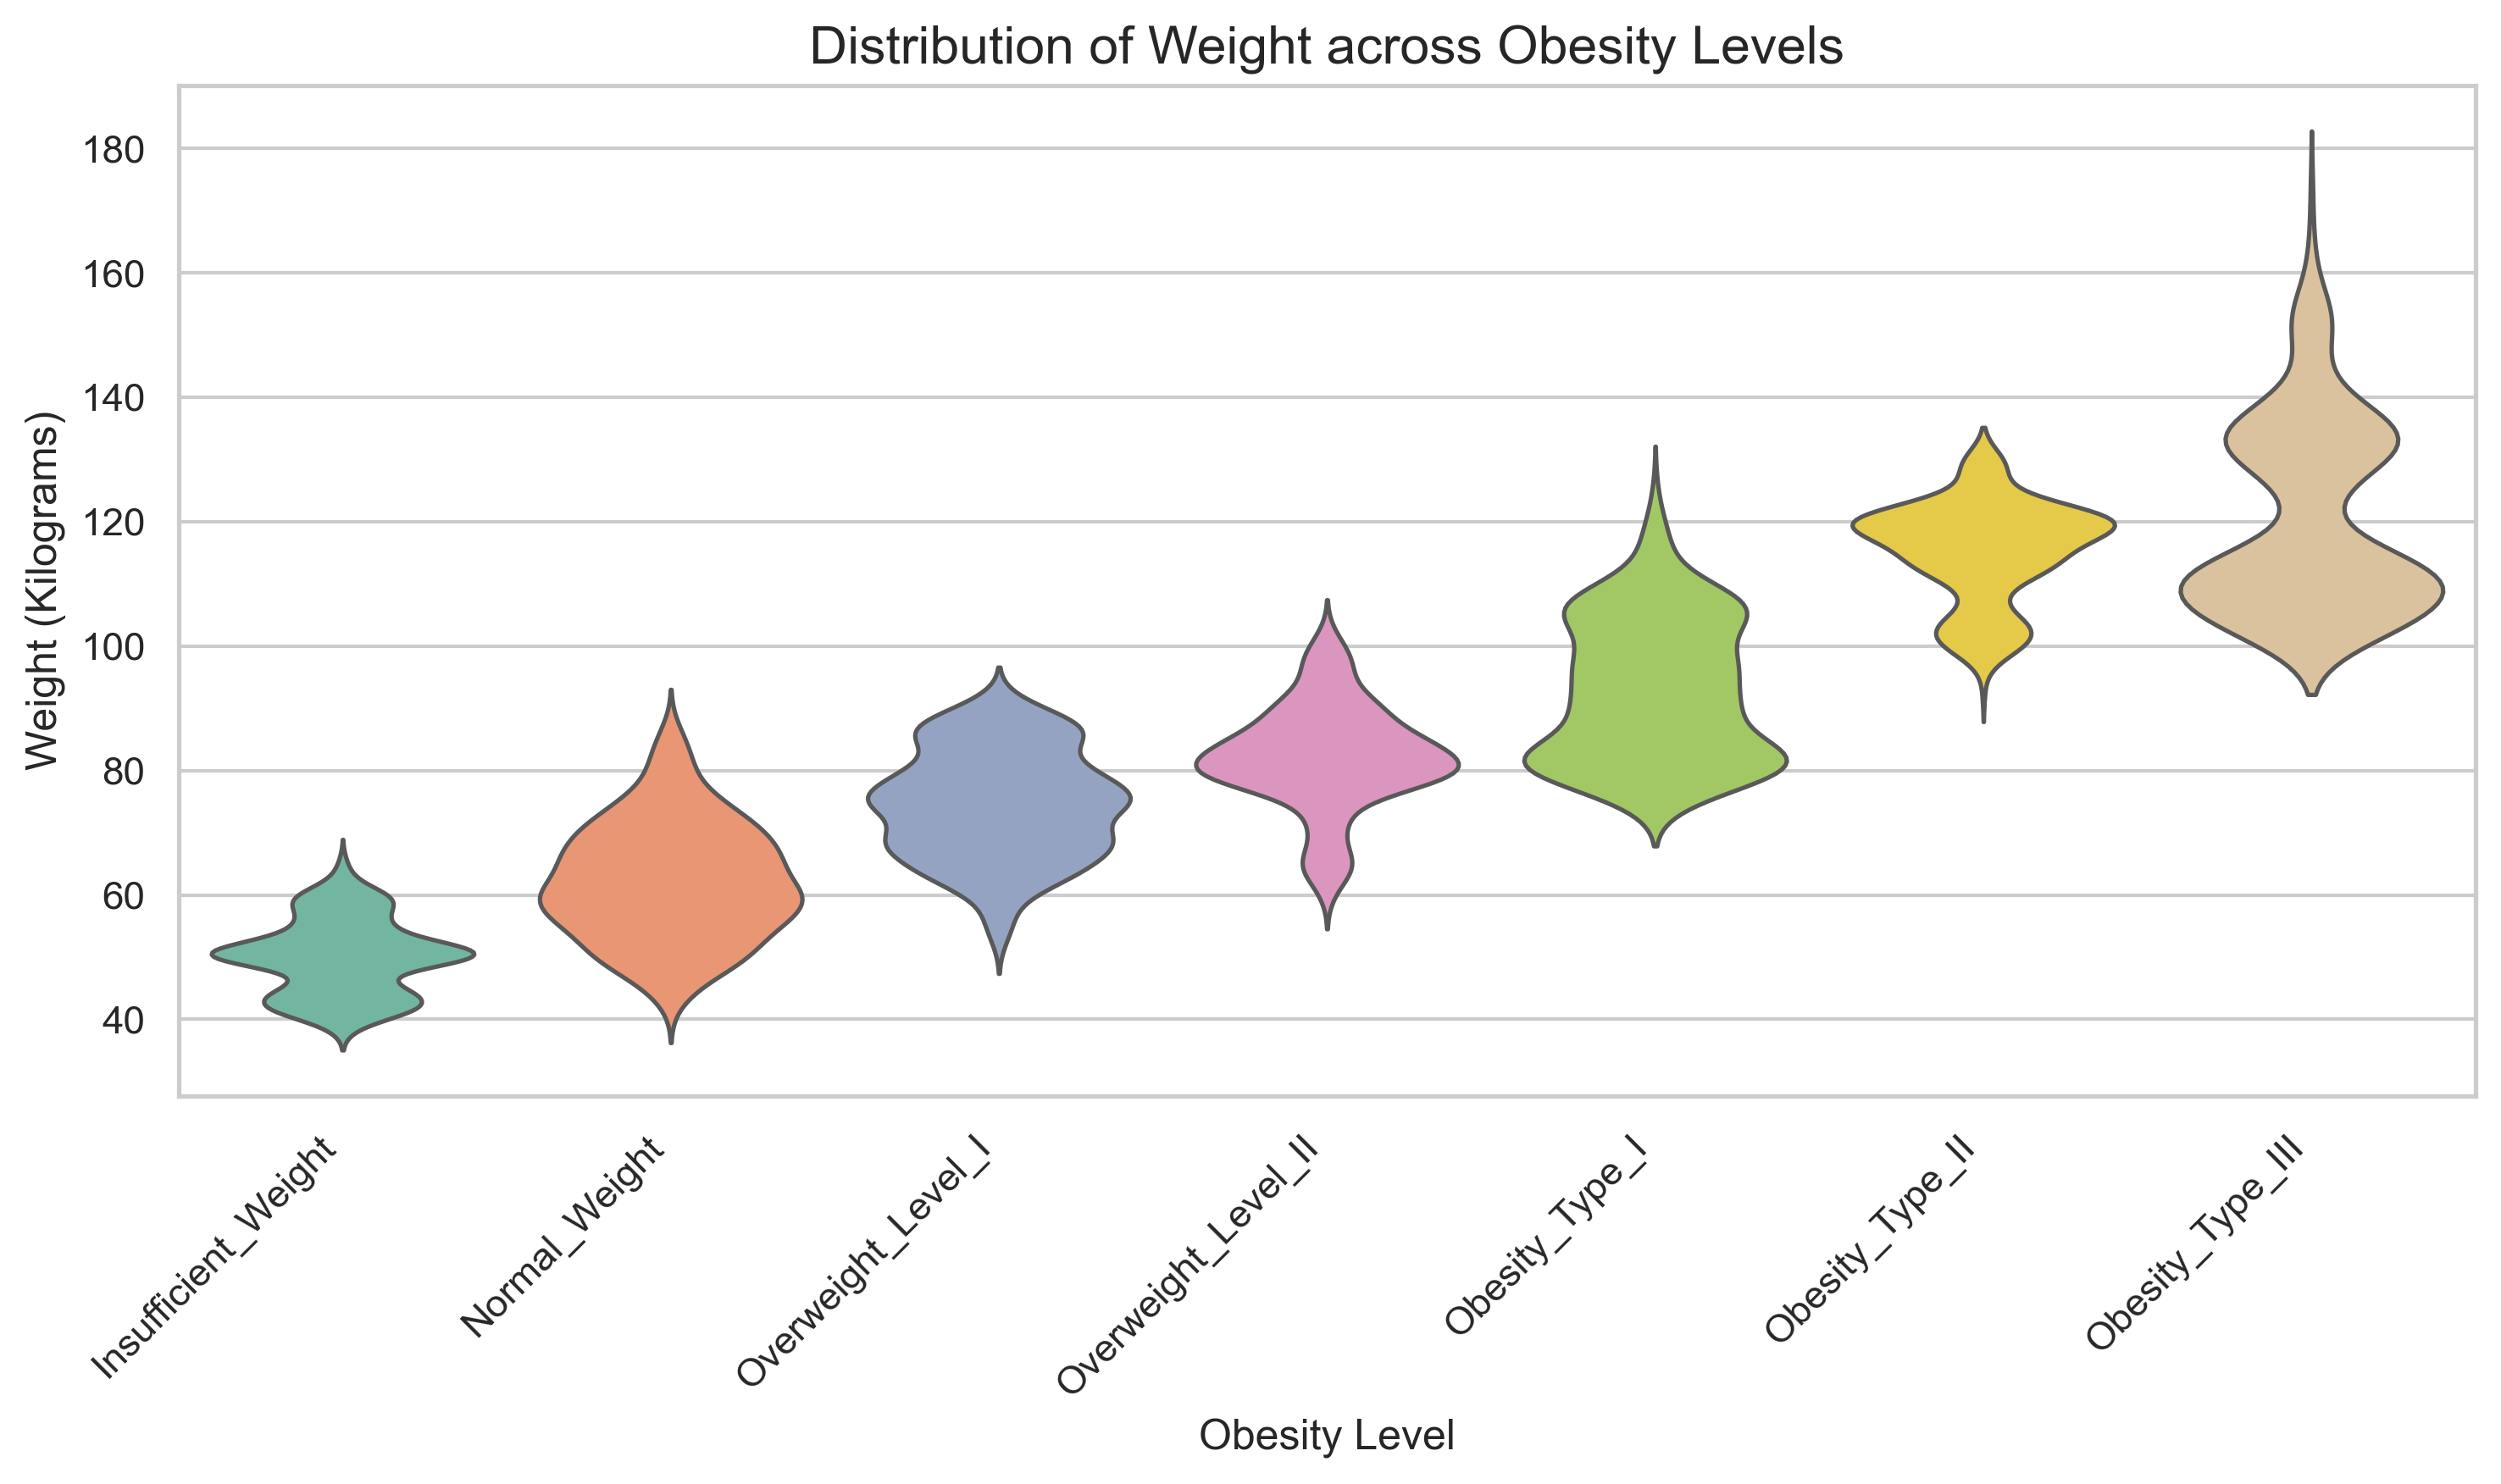

In [24]:
# Simple violin plot for Weight
sns.set(style="whitegrid")

plt.figure(figsize=(10,6), dpi=300)

sns.violinplot(
    x="NObeyesdad",
    y="Weight",
    data=df_ordered,
    palette="Set2",
    inner=None,
    hue="NObeyesdad",
    dodge=False 
)

plt.title("Distribution of Weight across Obesity Levels", fontsize=15)
plt.xlabel("Obesity Level")
plt.ylabel("Weight (Kilograms)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Distribution of Weight across Obesity Levels.jpg", format="jpg", dpi=300) 
plt.show()

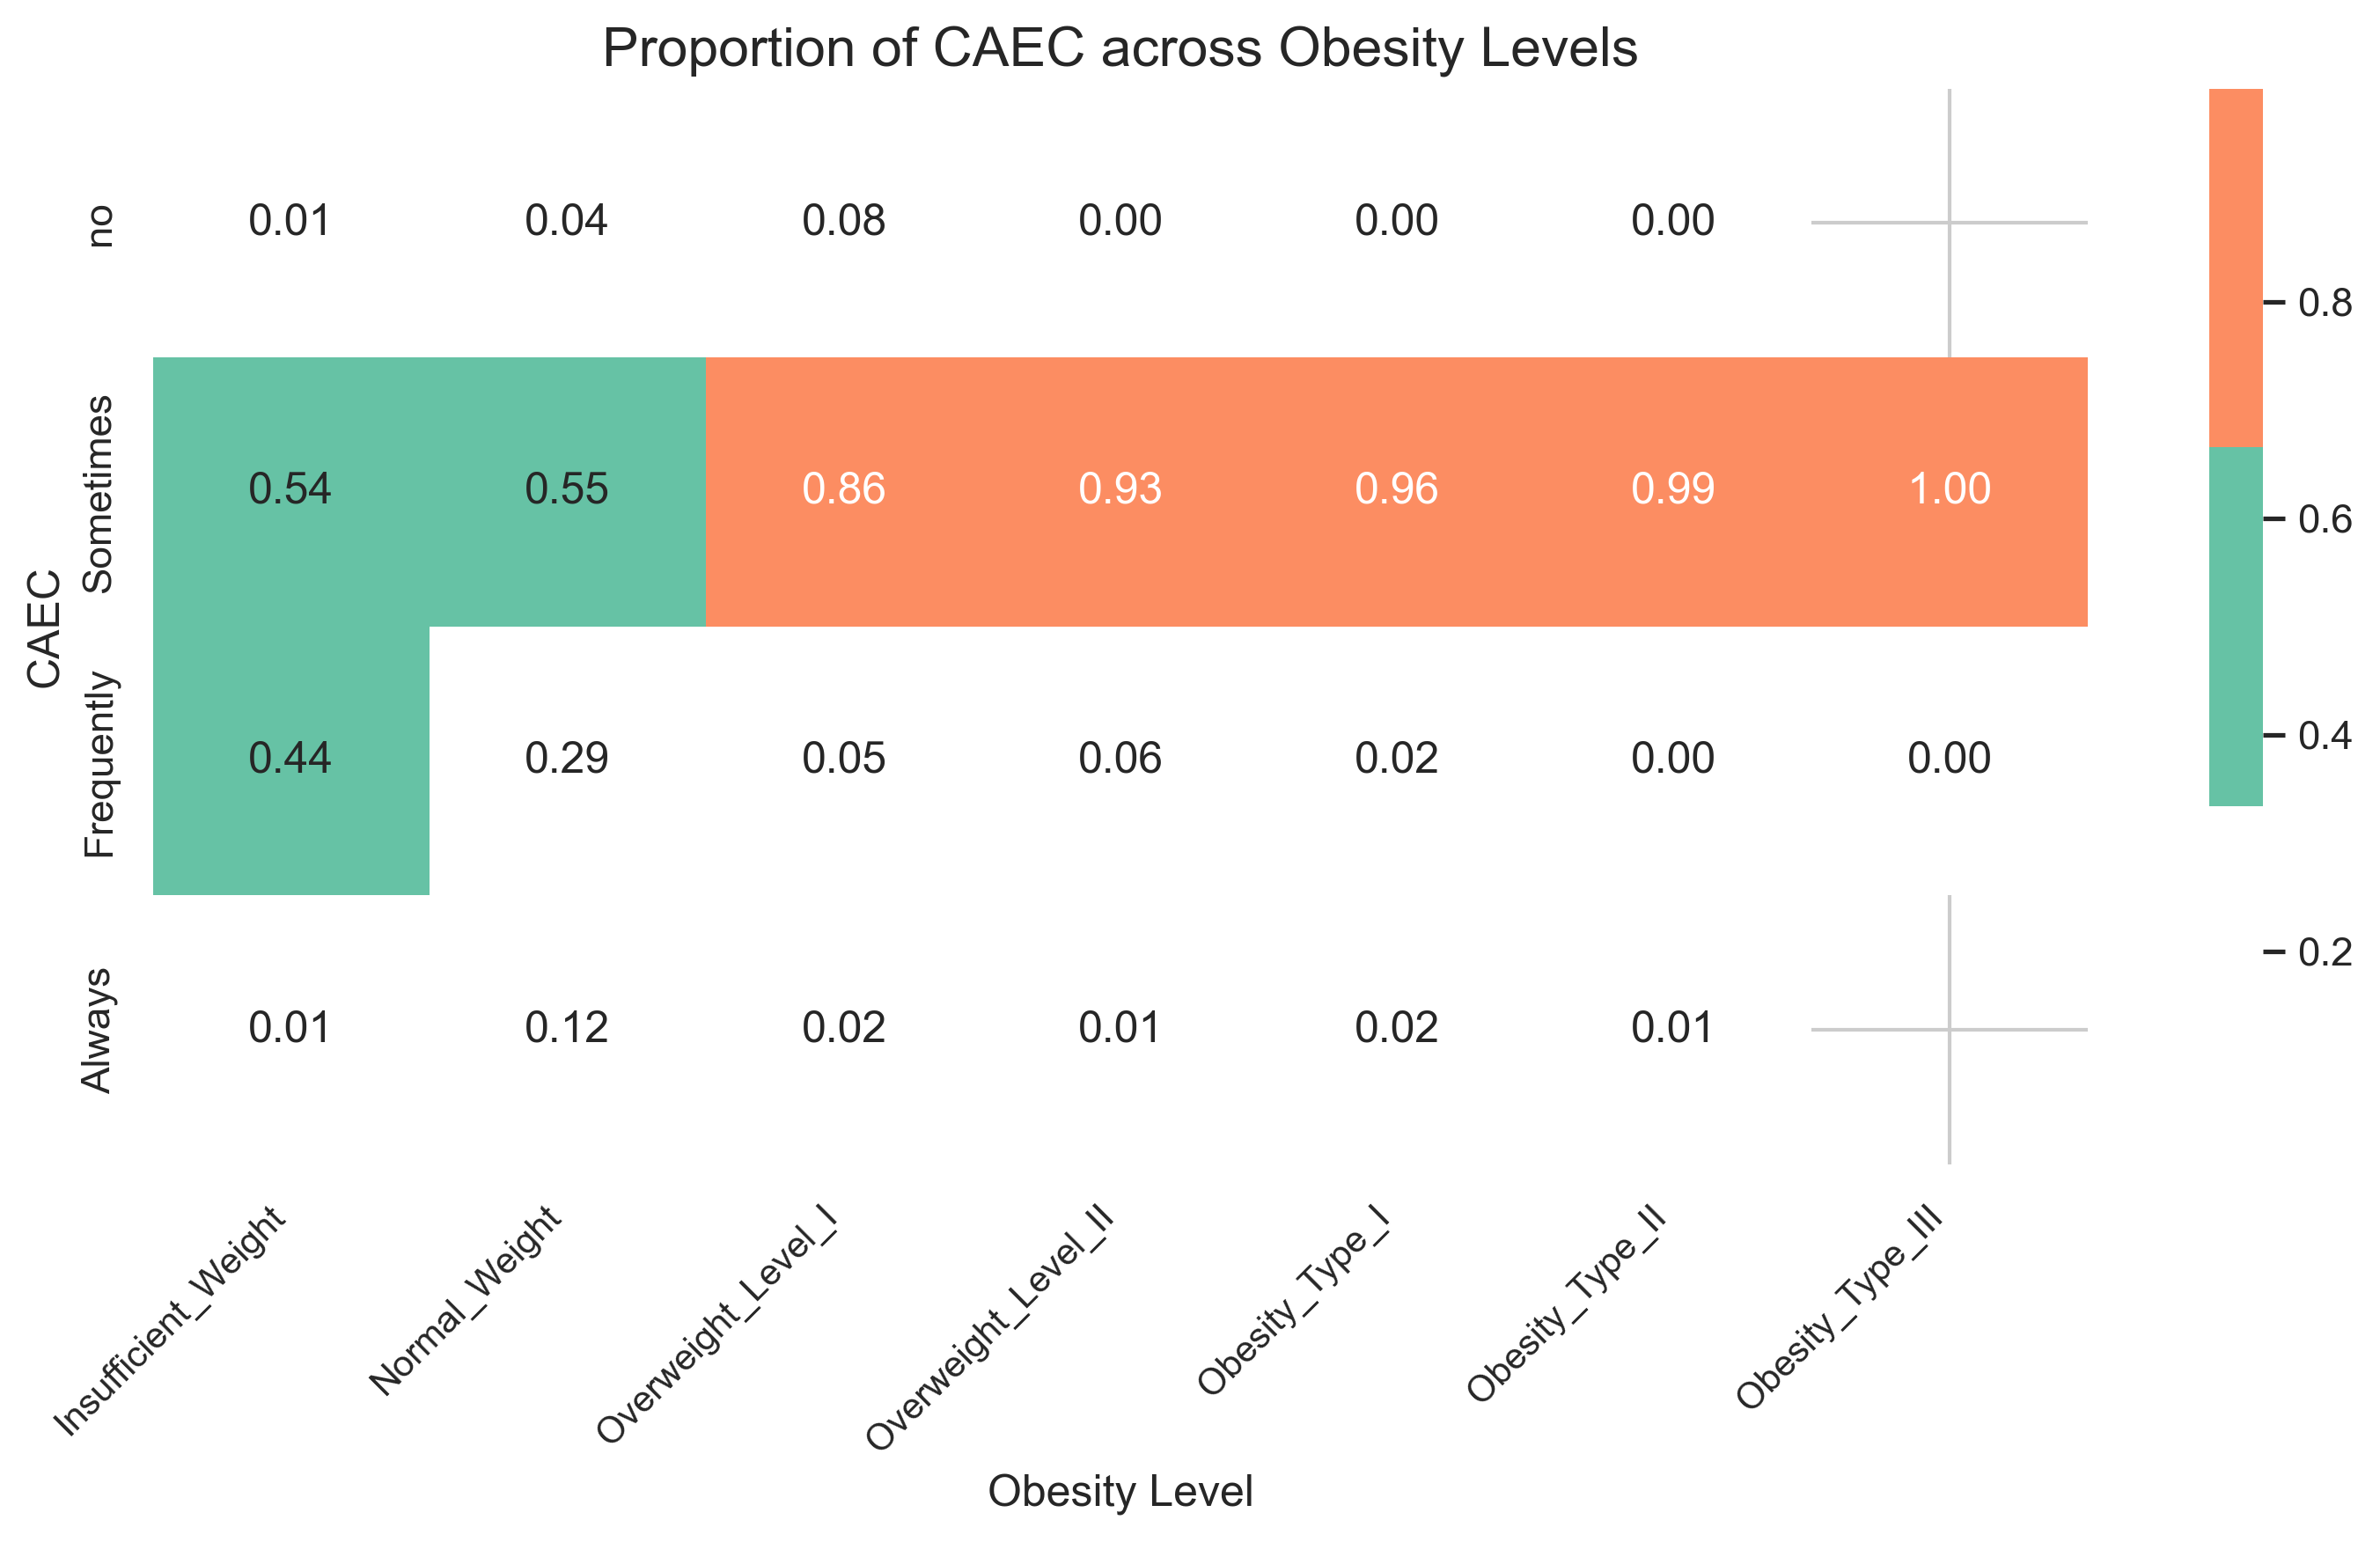

In [25]:
import numpy as np

set2_colors = sns.color_palette("Set2", 2)

def create_heatmap(predictor_var):
    prop_data = df_ordered.groupby(["NObeyesdad", predictor_var], observed=True).size().reset_index(name="n")
    prop_data["prop"] = prop_data.groupby("NObeyesdad", observed=True)["n"].transform(lambda x: x / x.sum())
    
    heatmap_data = prop_data.pivot(index=predictor_var, columns="NObeyesdad", values="prop")
    
    plt.figure(figsize=(10,6), dpi=300)
    sns.heatmap(
        heatmap_data,
        cmap = sns.color_palette(["#FFFFFF", set2_colors[0], set2_colors[1]], n_colors=10, as_cmap=True),
        annot=True, fmt=".2f")
    plt.title(f"Proportion of {predictor_var} across Obesity Levels", fontsize=15)
    plt.xlabel("Obesity Level")
    plt.ylabel(predictor_var)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.savefig("Proportion of across Obesity Levels", format="jpg", dpi=300) 
    plt.show()

create_heatmap("CAEC")

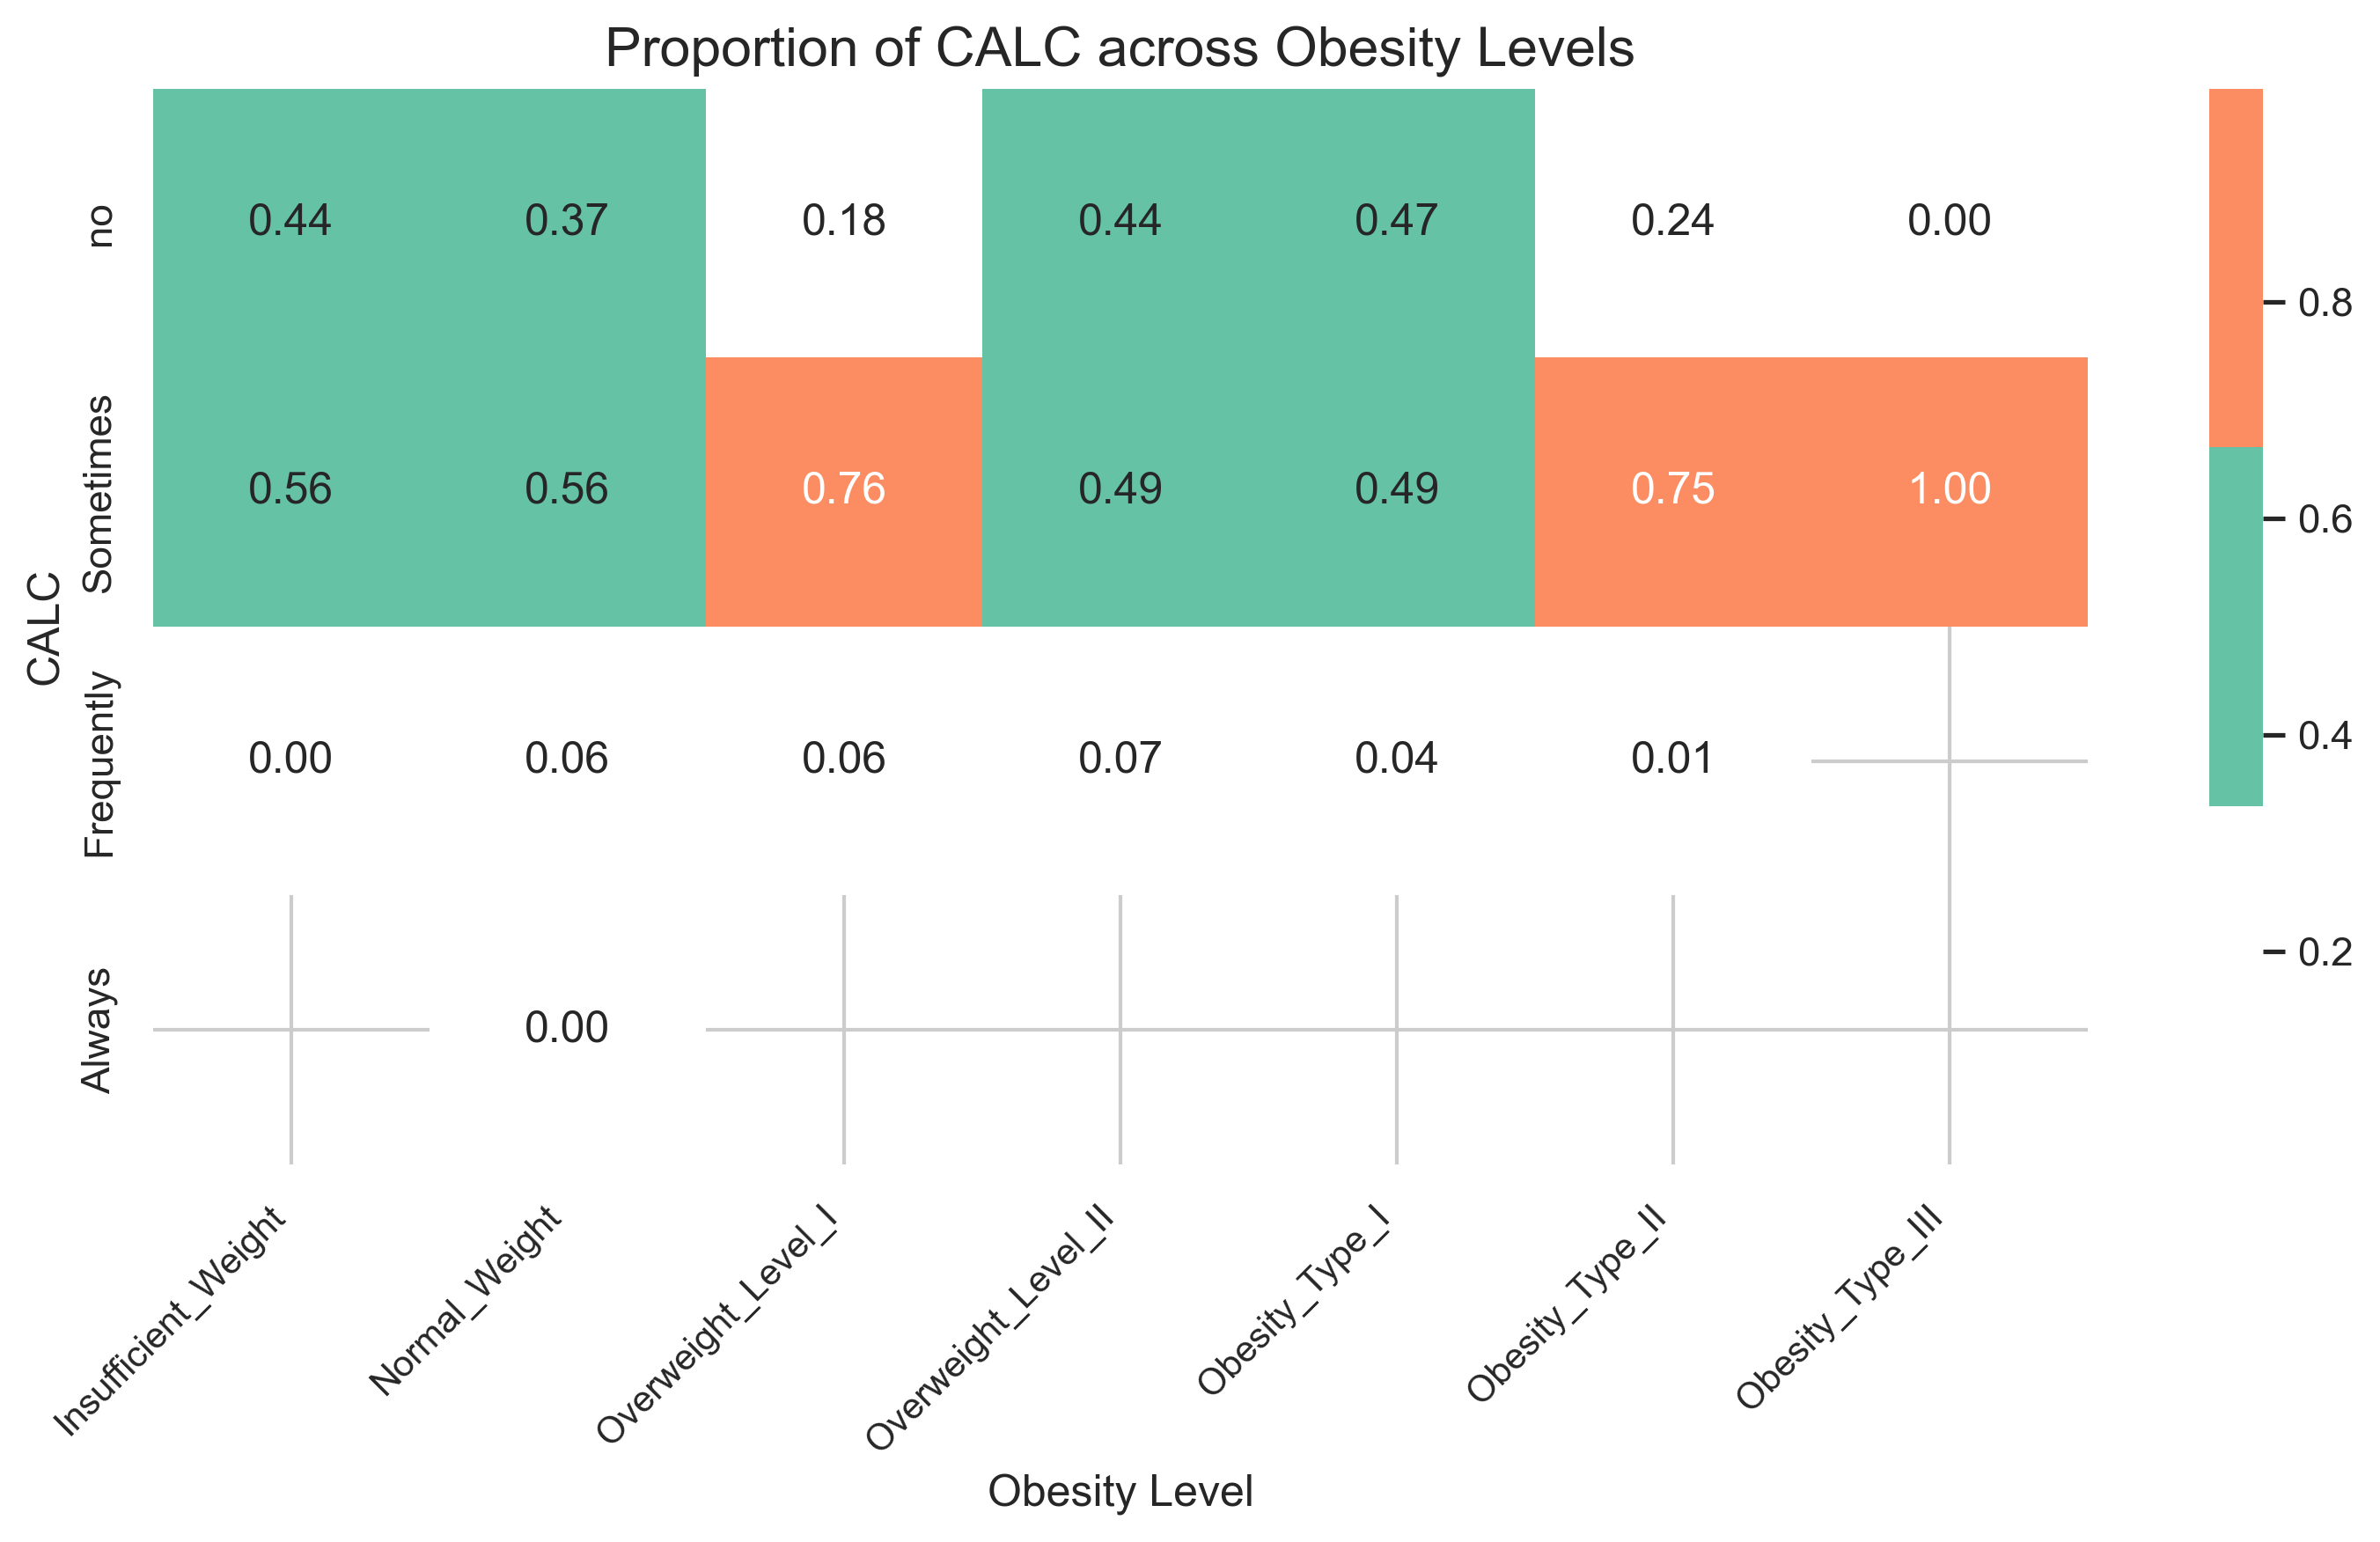

In [26]:
create_heatmap("CALC")

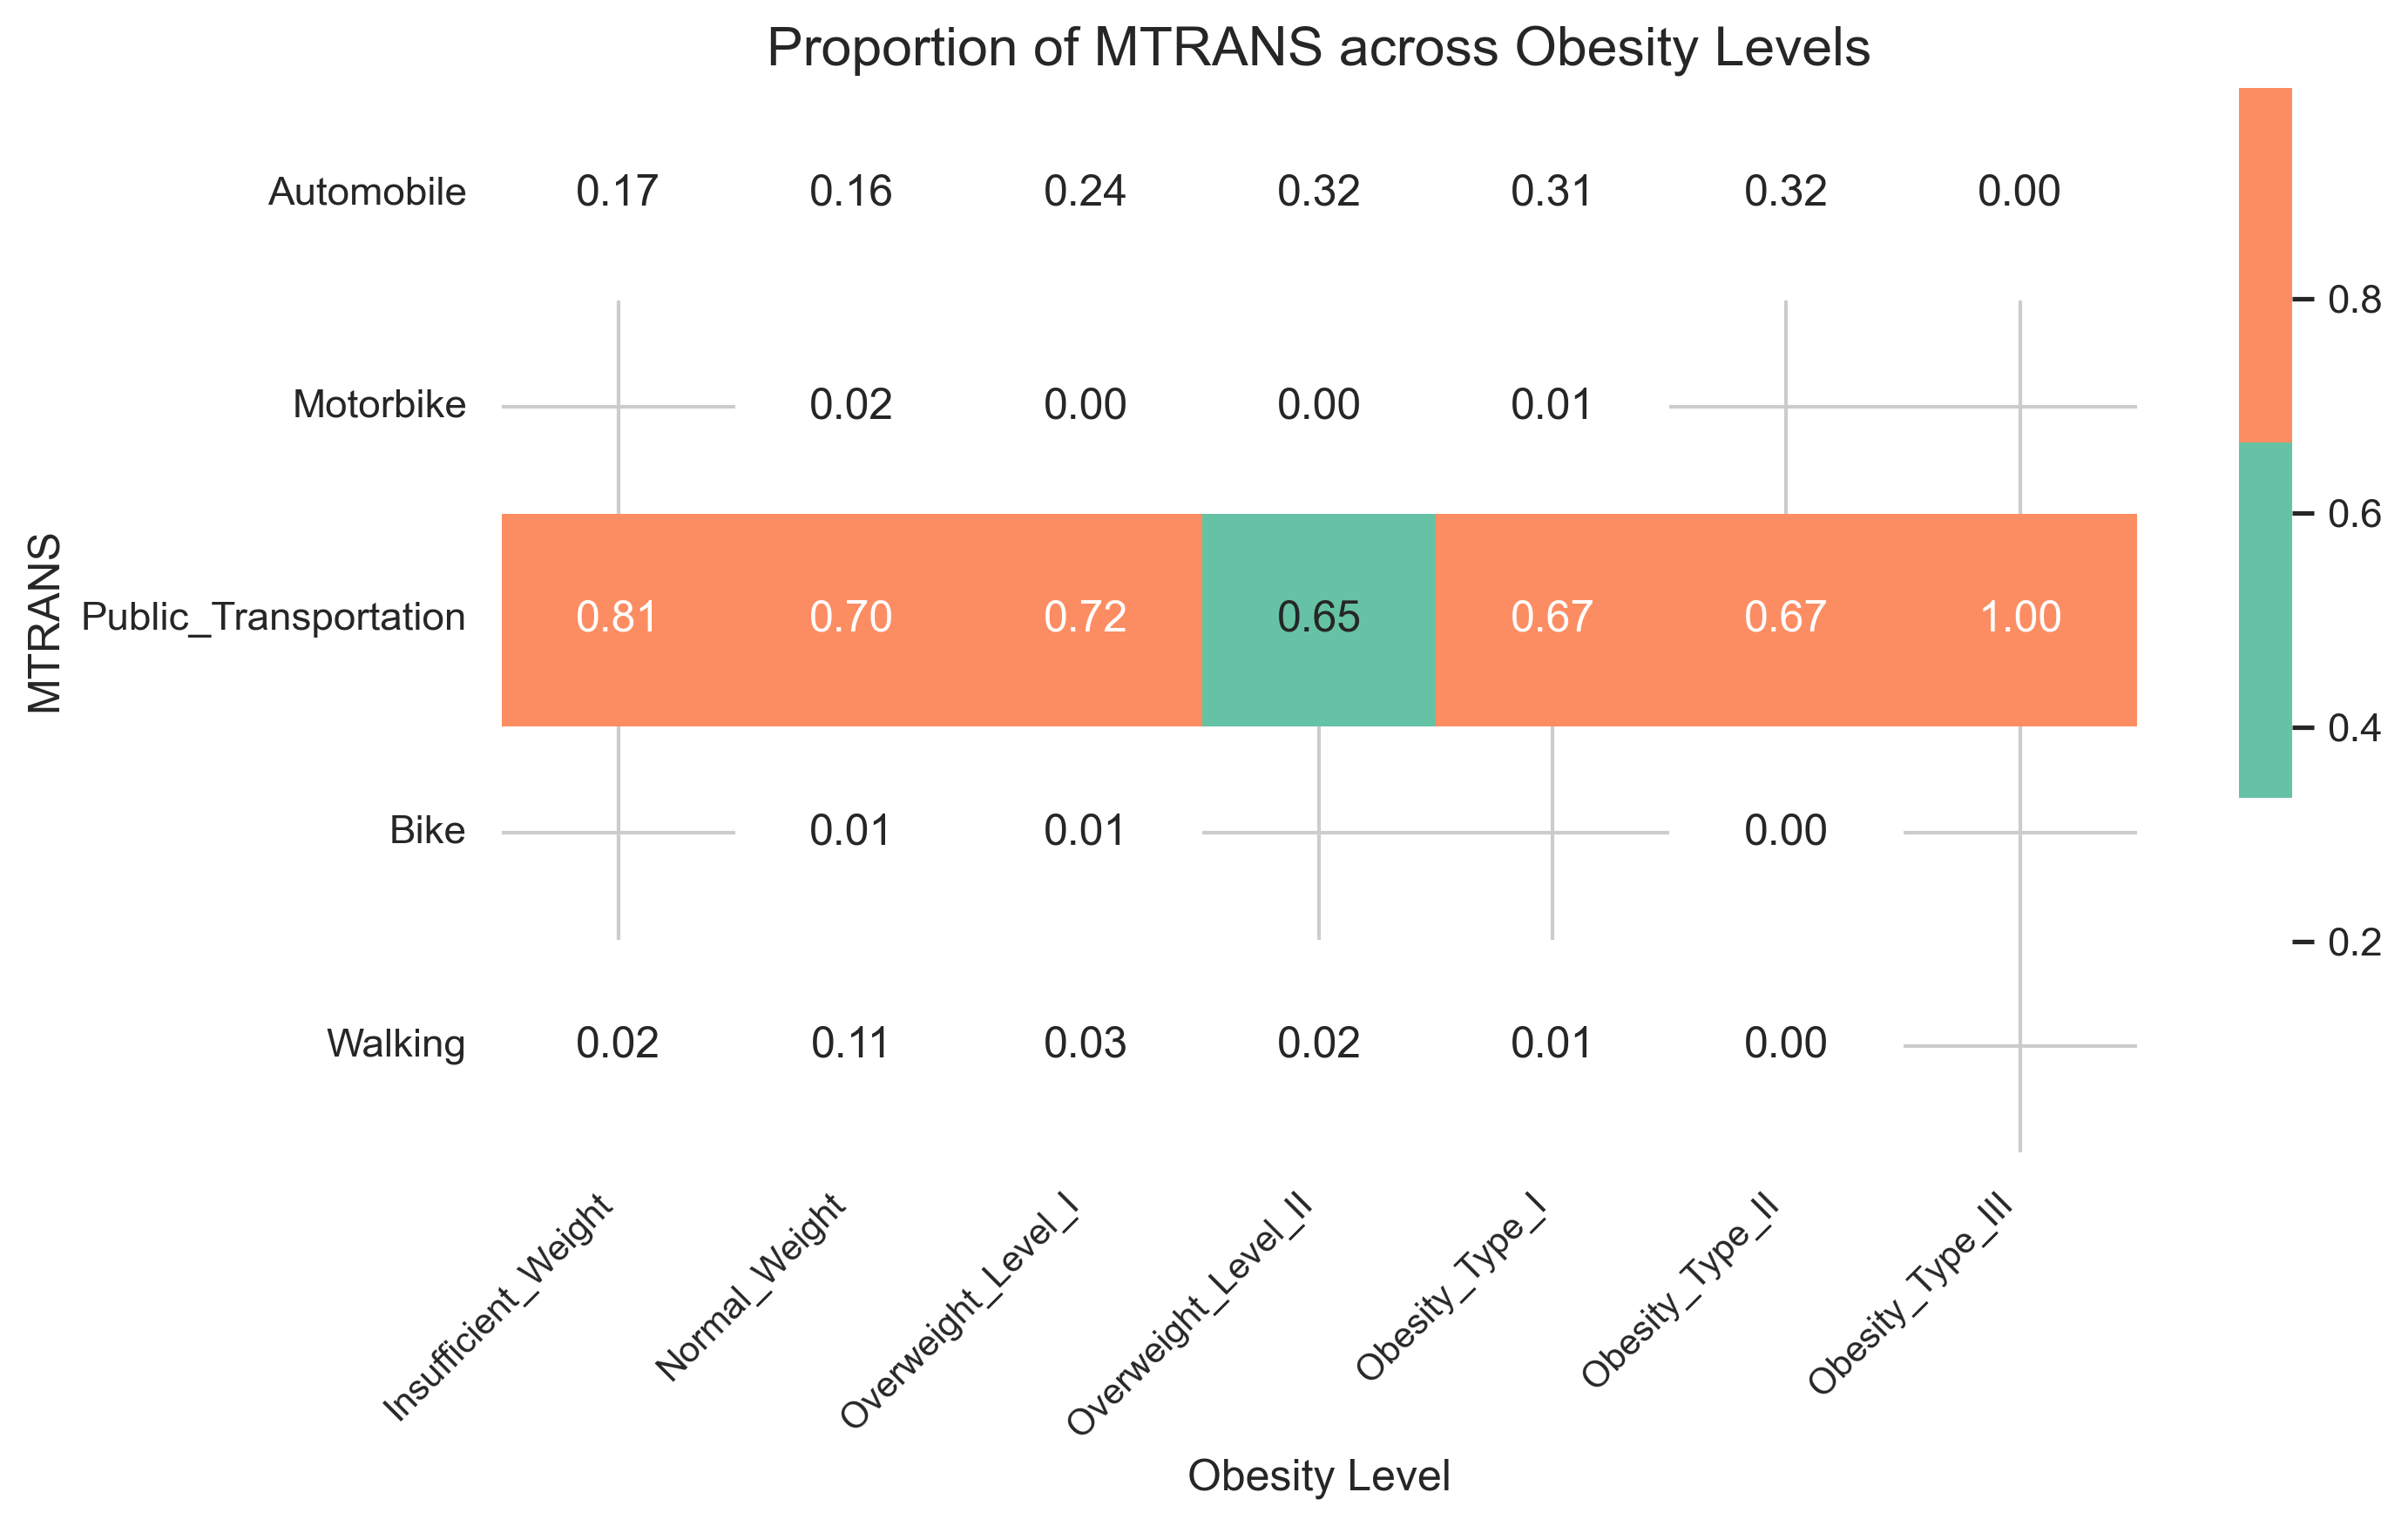

In [27]:
create_heatmap("MTRANS")

Logistic Regression

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Set plot style to mimic R's theme_minimal
sns.set_theme(style="white")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

In [30]:
# Load data
df = pd.read_csv("df_new.csv")

target_col = 'NObeyesdad'
cols_to_keep = [col for col in df.columns if 
                col.endswith('_std') or 
                col.startswith('Gender') or 
                col.startswith('CAEC') or 
                col.startswith('CALC') or 
                col.startswith('MTRANS') or 
                col.startswith('CH2O') or 
                col.startswith('FAF') or 
                col in ['FAVC', 'SMOKE', 'SCC',"NObeyesdad",target_col]]

simple_data = df[cols_to_keep].copy()

print(f"Data Dimension: {simple_data.shape}")

# Define the correct order for the target variable
obesity_order = [
    "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
    "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", 
    "Obesity_Type_III"
]

# Convert target to ordered categorical type
simple_data[target_col] = pd.Categorical(
    simple_data[target_col], 
    categories=obesity_order, 
    ordered=True
)

# Split data
X = simple_data.drop(columns=[target_col])
y = simple_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y)

print("Data preparation complete.")

print("Training Logistic Regression...")
model = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    penalty='l2',  
    C=7,
    max_iter=2000)
model.fit(X_train, y_train)
print("training complete")

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"training set accuracy: {train_acc:.4f}")
print(f"testing set accuracy: {test_acc:.4f}") 


Data Dimension: (2087, 29)
Data preparation complete.
Training Logistic Regression...
training complete
training set accuracy: 0.9533
testing set accuracy: 0.9402


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


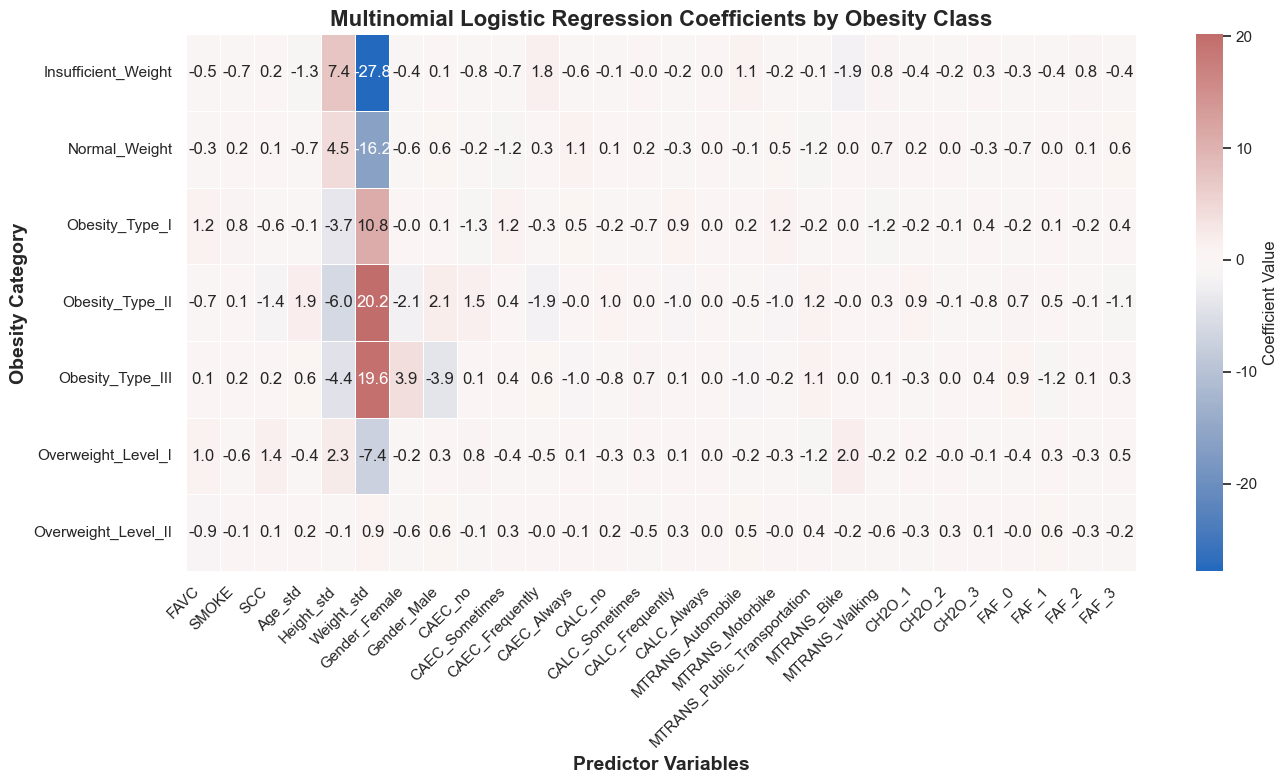

In [31]:
# Extract coefficients
coefs = model.coef_
feature_names = X.columns
class_names = model.classes_ 

# Create DataFrame for coefficients
coef_df = pd.DataFrame(coefs, index=class_names, columns=feature_names)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(
    coef_df, 
    cmap="vlag", 
    center=0, 
    annot=True,
    fmt=".1f", 
    cbar_kws={'label': 'Coefficient Value'},
    linewidths=0.5,
    linecolor='white'
)

plt.title("Multinomial Logistic Regression Coefficients by Obesity Class", fontsize=16, fontweight='bold')
plt.xlabel("Predictor Variables", fontsize=14, fontweight='bold')
plt.ylabel("Obesity Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


=== ACC: 0.9402 ===



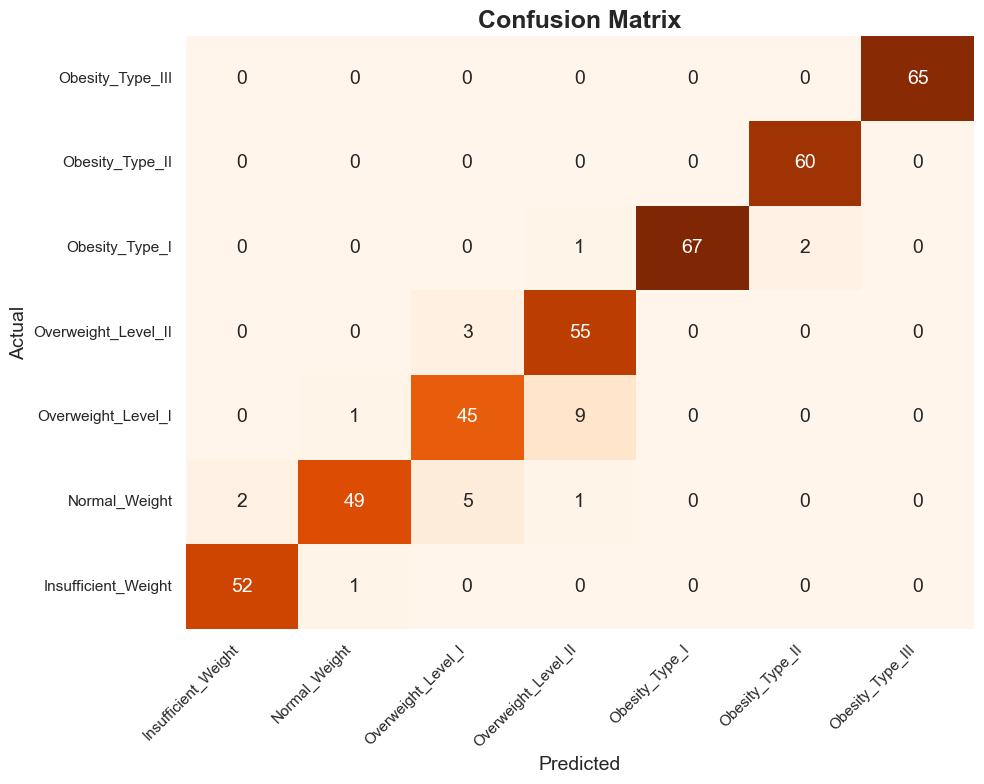

In [32]:
# Predict classes
y_pred = model.predict(X_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n=== ACC: {acc:.4f} ===\n")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=obesity_order)

cm_df = pd.DataFrame(cm[::-1], index=obesity_order[::-1], columns=obesity_order)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_df, 
    annot=True, 
    fmt="d",
    cmap="Oranges", 
    cbar=False,
    annot_kws={"size": 14}
)

plt.title("Confusion Matrix", fontsize=18, fontweight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

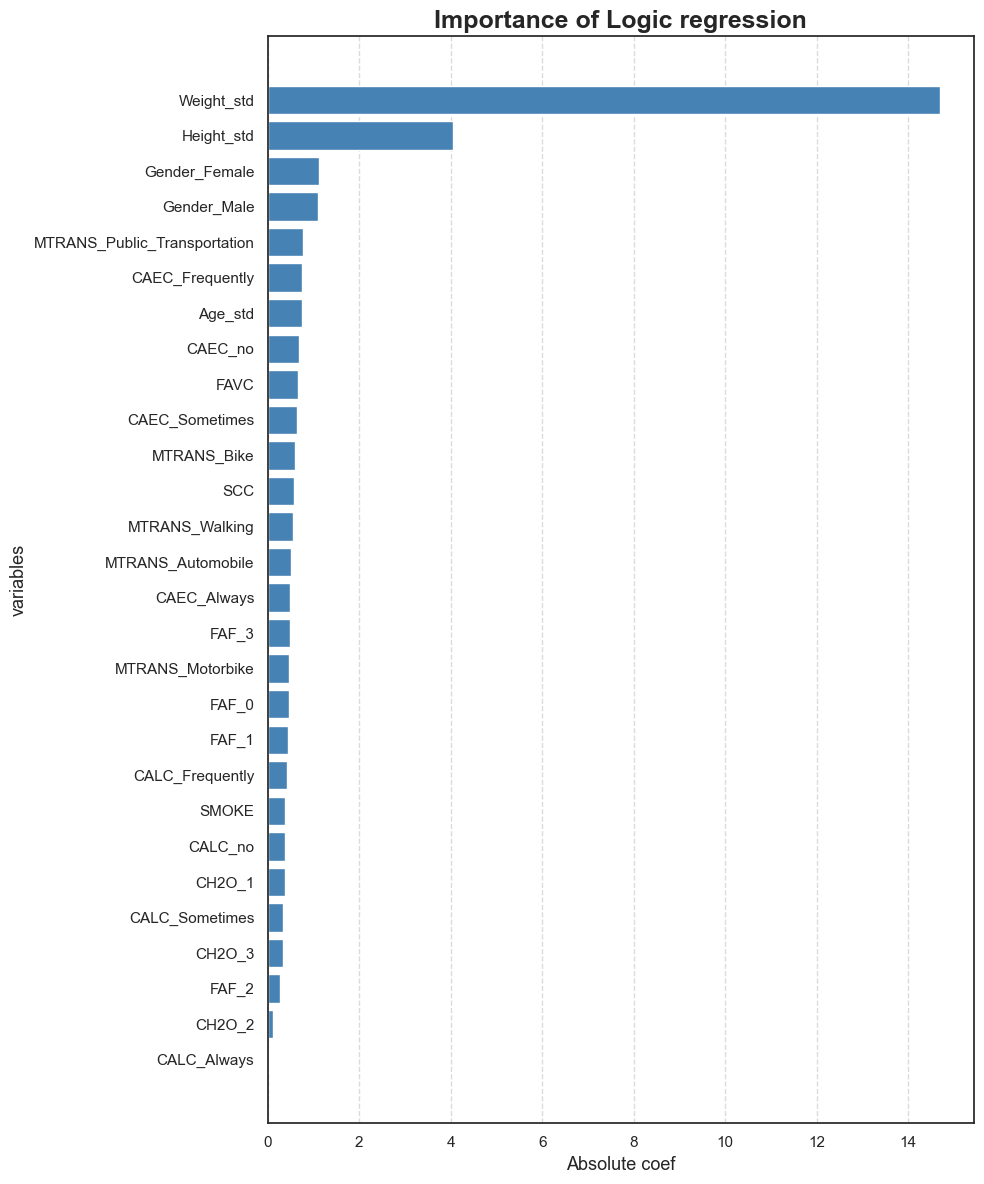

In [33]:
# Calculate Importance (mean of absolute coefficients)
importance = np.abs(coef_df).mean(axis=0)

importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=True) 

# Plotting
plt.figure(figsize=(10, 12))
plt.barh(importance_df['Variable'], importance_df['Importance'], color="steelblue")

plt.title("Importance of Logic regression", fontsize=18, fontweight='bold')
plt.xlabel("Absolute coef", fontsize=13)
plt.ylabel("variables", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


KNN

/var/folders/f3/7w2snt6x1jv80170lgq4zxmh0000gn/T/ipykernel_23397/2369557652.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_data['NObeyesdad'] = knn_data['NObeyesdad'].astype('category')


=== KNN ===
K =  1 | test set ACC: 0.8636 
K =  3 | test set ACC: 0.8397 
K =  5 | test set ACC: 0.8038 
K =  7 | test set ACC: 0.7656 
K =  9 | test set ACC: 0.7584 
K = 11 | test set ACC: 0.7656 
K = 15 | test set ACC: 0.7608 
K = 20 | test set ACC: 0.7703 
K = 30 | test set ACC: 0.7249 
K = 40 | test set ACC: 0.6914 
K = 50 | test set ACC: 0.6986 


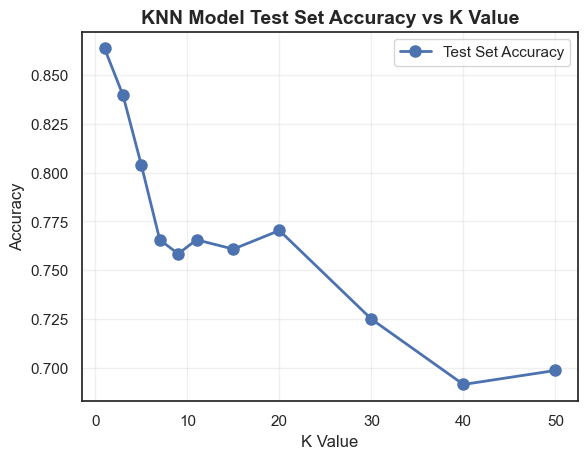


best k-value based on test sest: 1.0, Accuracy: 0.8636

=== Results ===
 K  Accuracy
 1    0.8636
 3    0.8397
 5    0.8038
 7    0.7656
 9    0.7584
11    0.7656
15    0.7608
20    0.7703
30    0.7249
40    0.6914
50    0.6986


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# prepare data
df = pd.read_csv("df_new.csv")

knn_data = df.filter(regex='_std$|^Gender|^CAEC|^CALC|^MTRANS|^CH2O|^FAF|FAVC|SMOKE|SCC|NObeyesdad')
knn_data['NObeyesdad'] = knn_data['NObeyesdad'].astype('category')

# cut data
X = knn_data.drop('NObeyesdad', axis=1)
y = knn_data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

# define k-values
k_values = [1, 3, 5, 7, 9, 11, 15, 20, 30, 40, 50]

results = []
cv_results = []

print("=== KNN ===")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
        
    results.append({
        'K': k, 
        'Accuracy': accuracy
    })
    
    print(f"K = {k:2d} | test set ACC: {accuracy:.4f} ")

# DataFrame
results_df = pd.DataFrame(results)

# Visualization
fig, (ax1) = plt.subplots(1, 1)

# Accuracy of test set
ax1.plot(results_df['K'], results_df['Accuracy'], 'bo-', linewidth=2, markersize=8, label='Test Set Accuracy')
ax1.set_xlabel('K Value', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('KNN Model Test Set Accuracy vs K Value', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
plt.show()

# find the best k-value based on test set
best_test = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nbest k-value based on test sest: {best_test['K']}, Accuracy: {best_test['Accuracy']:.4f}")

# result
print("\n=== Results ===")
display_results = results_df.copy()
display_results['Accuracy'] = display_results['Accuracy'].round(4)
print(display_results.to_string(index=False))

Trees

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
target_col = "NObeyesdad"
order_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
class_names_list = [
    'Insufficient', 'Normal', 'Overwt_I', 'Overwt_II', 
    'Obese_I', 'Obese_II', 'Obese_III'
]

selected_cols = [c for c in df.columns if 
                 c.endswith("_std") or 
                 c.startswith(("Gender", "CAEC", "CALC", "MTRANS", "CH2O", "FAF")) or 
                 c in ["FAVC", "SMOKE", "SCC", "NObeyesdad"]]
tree_data = df[selected_cols].copy()
tree_data

FAVC  SMOKE  SCC           NObeyesdad  Age_std  Height_std  Weight_std  \
0        0      0    0        Normal_Weight  -0.5220     -0.8754     -0.8624   
1        0      1    1        Normal_Weight  -0.5220     -1.9471     -1.1678   
2        0      0    0        Normal_Weight  -0.2068      1.0538     -0.3660   
3        0      0    0   Overweight_Level_I   0.4235      1.0538      0.0158   
4        0      0    0  Overweight_Level_II  -0.3644      0.8394      0.1227   
...    ...    ...  ...                  ...      ...         ...         ...   
2082     1      0    0     Obesity_Type_III  -0.5256      0.0970      1.7114   
2083     1      0    0     Obesity_Type_III  -0.3671      0.5027      1.8005   
2084     1      0    0     Obesity_Type_III  -0.2818      0.5415      1.7984   
2085     1      0    0     Obesity_Type_III   0.0078      0.4048      1.7854   
2086     1      0    0     Obesity_Type_III  -0.1021      0.3983      1.7902   

      Gender_Female  Gender_Male  CAEC_no  ...  MTRANS_Public_Transportation  \
0                 1            0        0  ...                             1   
1                 1            0        0  ...                             1   
2                 0            1        0  ...                             1   
3                 0            1        0  ...                             0   
4                 0            1        0  ...                             1   
...             ...          ...      ...  ...                           ...   
2082              1            0        0  ...                             1   
2083              1            0        0  ...                             1   
2084              1            0        0  ...                             1   
2085              1            0        0  ...                             1   
2086              1            0        0  ...                             1   

      MTRANS_Bike  MTRANS_Walking  CH2O_1  CH2O_2  CH2O_3  FAF_0  FAF_1  \
0               0               0       0       1       0      1      0   
1               0               0       0       0       1      0      0   
2               0               0       0       1       0      0      0   
3               0               1       0       1       0      0      0   
4               0               0       0       1       0      1      0   
...           ...             ...     ...     ...     ...    ...    ...   
2082            0               0       0       1       0      0      0   
2083            0               0       0       1       0      0      1   
2084            0               0       0       1       0      0      1   
2085            0               0       0       0       1      0      1   
2086            0               0       0       0       1      0      1   

      FAF_2  FAF_3  
0         0      0  
1         0      1  
2         1      0  
3         1      0  
4         0      0  
...     ...    ...  
2082      1      0  
2083      0      0  
2084      0      0  
2085      0      0  
2086      0      0  

[2087 rows x 29 columns]

In [39]:
X = tree_data.drop(columns=[target_col])
y = tree_data[target_col].map(order_map)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

In [41]:
clf = DecisionTreeClassifier(random_state=123, max_depth=4) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

In [42]:
y_pred = clf.predict(X_test)
print("=== Model Performance ===")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Model Performance ===
Test Accuracy: 0.7344

=== Confusion Matrix ===
[[49  4  0  0  0  0  0]
 [ 2 32 21  2  0  0  0]
 [ 0  3 27 25  0  0  0]
 [ 0  1 11 35 11  0  0]
 [ 0  0  0 13 45 12  0]
 [ 0  0  0  0  6 54  0]
 [ 0  0  0  0  0  0 65]]


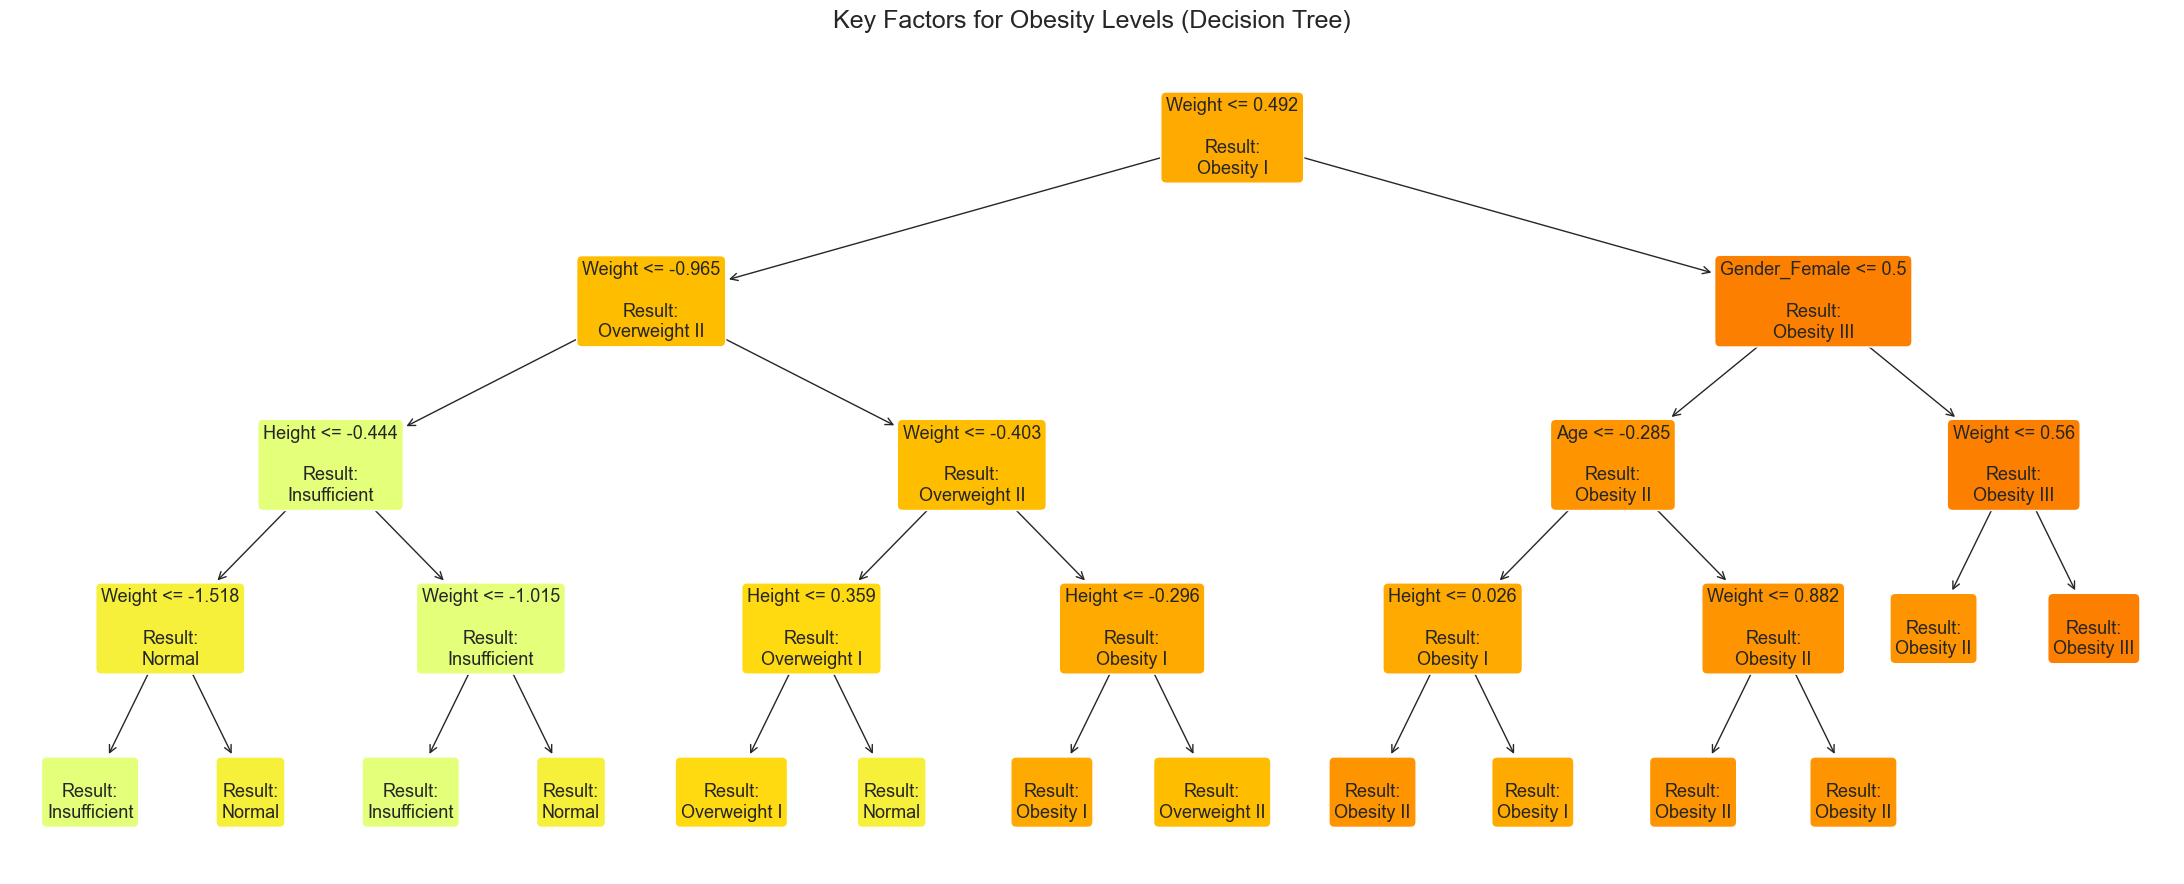

In [43]:
class_labels = [
    'Insufficient',   # 0
    'Normal',         # 1
    'Overweight I',   # 2
    'Overweight II',  # 3
    'Obesity I',      # 4
    'Obesity II',     # 5
    'Obesity III'     # 6
]
clean_feature_names = [c.replace("_std", "").replace("MTRANS_", "Trans: ").replace("CALC_", "Calc: ") for c in X.columns]
plt.figure(figsize=(22, 9))
artists = plot_tree(clf, 
                    feature_names=clean_feature_names, # Use cleaned names
                    class_names=class_labels,          # Use text labels (not numbers)
                    filled=True,                       # Colors
                    rounded=True,                      # Soft edges
                    fontsize=13,                       # Readable font size
                    impurity=False)                    # Hide Gini score
for text_obj in artists:
    original_text = text_obj.get_text()
    lines = original_text.split('\n')
    new_lines = []
    for line in lines:
        if "<=" in line:
            clean_rule = line.strip()
            new_lines.append(f"{clean_rule}")
        if "class =" in line:
            class_name = line.split("=")[-1].strip()
            new_lines.append(f"\nResult:\n{class_name}")
    if "class =" in line:
        text_obj.get_bbox_patch().set_facecolor(plt.cm.Wistia(class_labels.index(class_name) / 6))
    text_obj.set_text("\n".join(new_lines))

plt.title("Key Factors for Obesity Levels (Decision Tree)", fontsize=18, pad=20)
plt.tight_layout()
# Save high res for PPT
plt.savefig("beautiful_tree.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/f3/7w2snt6x1jv80170lgq4zxmh0000gn/T/ipykernel_23397/3101483570.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


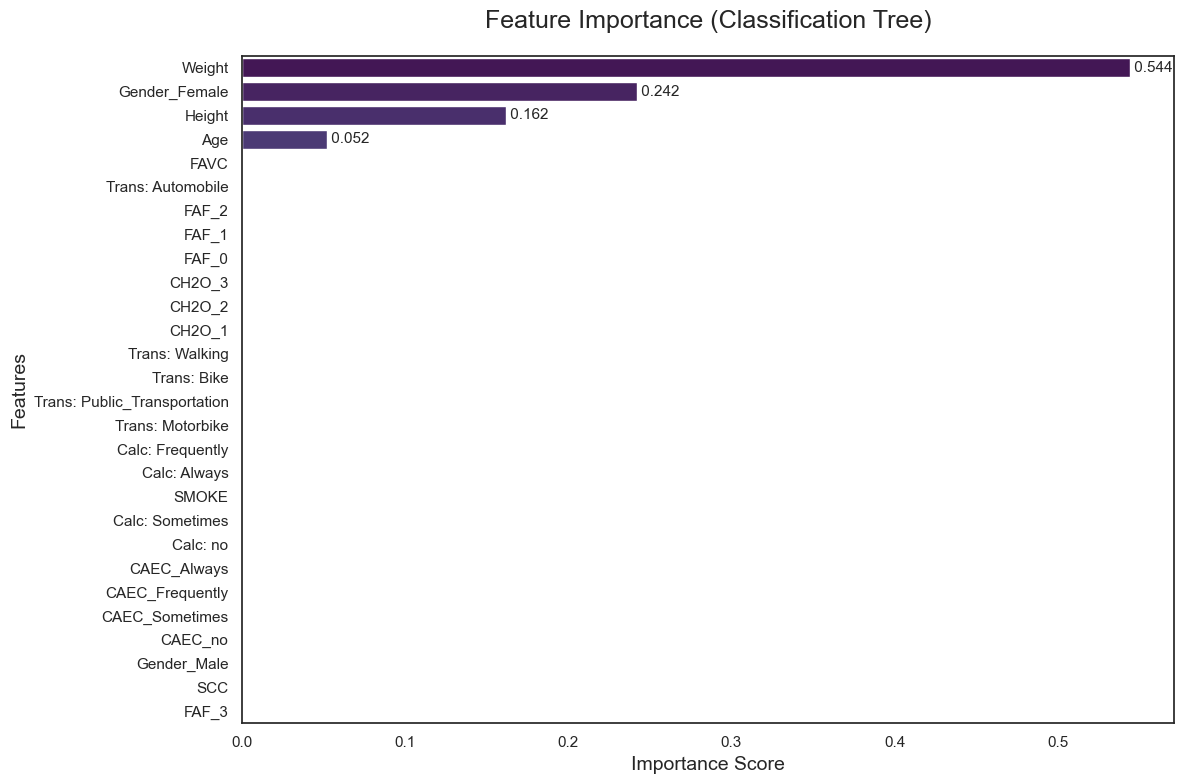

In [44]:
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': clean_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title("Feature Importance (Classification Tree)", fontsize=18, pad=20)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)

for index, value in enumerate(feature_imp_df['Importance']):
    if value > 0.001: 
        plt.text(value, index, f' {value:.3f}', va='center', fontsize=11)

plt.tight_layout()
plt.savefig("feature_importance_class.png", dpi=300, bbox_inches='tight')
plt.show()

In [45]:
clf = DecisionTreeRegressor(random_state=123, max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=123)

In [46]:
clf = DecisionTreeRegressor(random_state=123, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"R² Score {r2_score(y_test, y_pred):.4f}") 
print(f"RMSE: {mean_squared_error(y_test, y_pred):.4f}")

R² Score 0.9565
RMSE: 0.1716


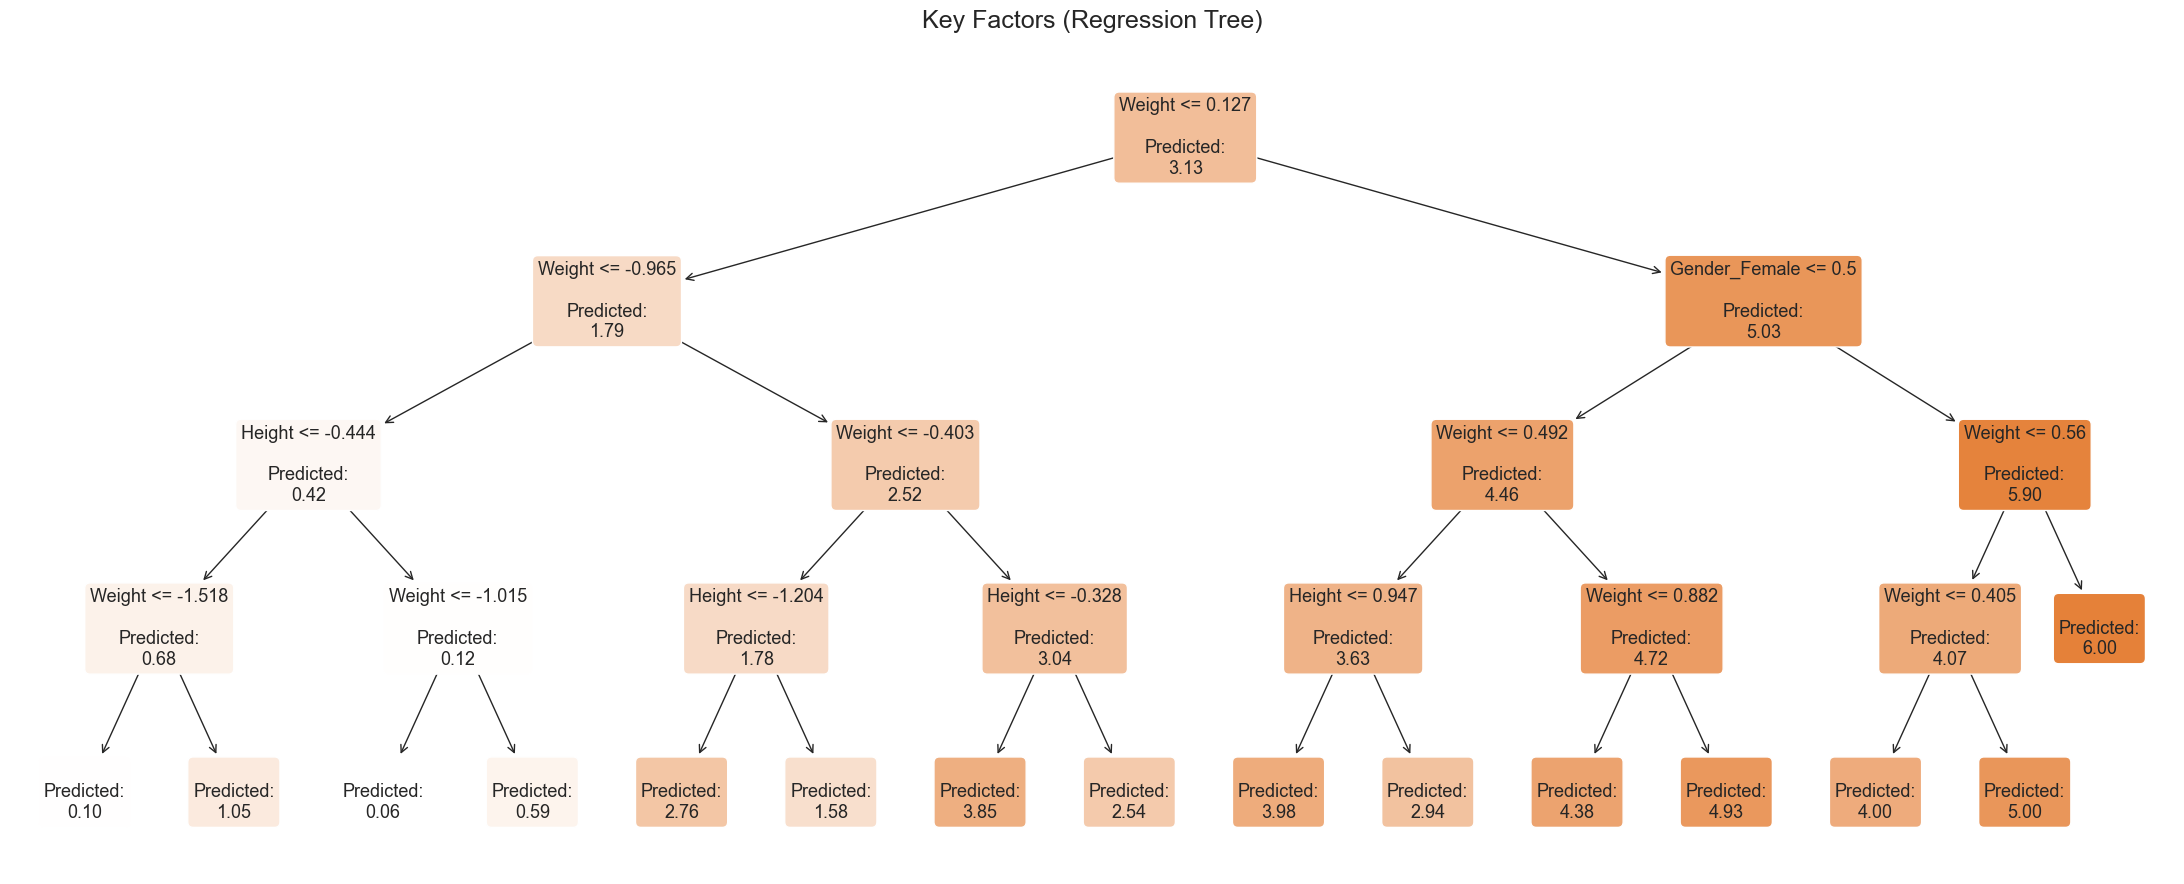

In [47]:
clean_feature_names = [c.replace("_std", "").replace("MTRANS_", "Trans: ").replace("CALC_", "Calc: ") for c in X.columns]

plt.figure(figsize=(22, 9))
artists = plot_tree(clf, 
          feature_names=clean_feature_names,
          filled=True,
          rounded=True,
          fontsize=13,
          impurity=False)

for text_obj in artists:
    original_text = text_obj.get_text()
    lines = original_text.split('\n')
    new_lines = []
    for line in lines:
        if "<=" in line:
            new_lines.append(line.strip())
        if "value =" in line:
            val_str = line.split("=")[-1].strip()
            val_num = float(val_str)
            new_lines.append(f"\nPredicted:\n{val_num:.2f}")
    text_obj.set_text("\n".join(new_lines))

plt.title("Key Factors (Regression Tree)", fontsize=18, pad=20)
plt.tight_layout()
plt.savefig("regression_tree.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/f3/7w2snt6x1jv80170lgq4zxmh0000gn/T/ipykernel_23397/2729615266.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


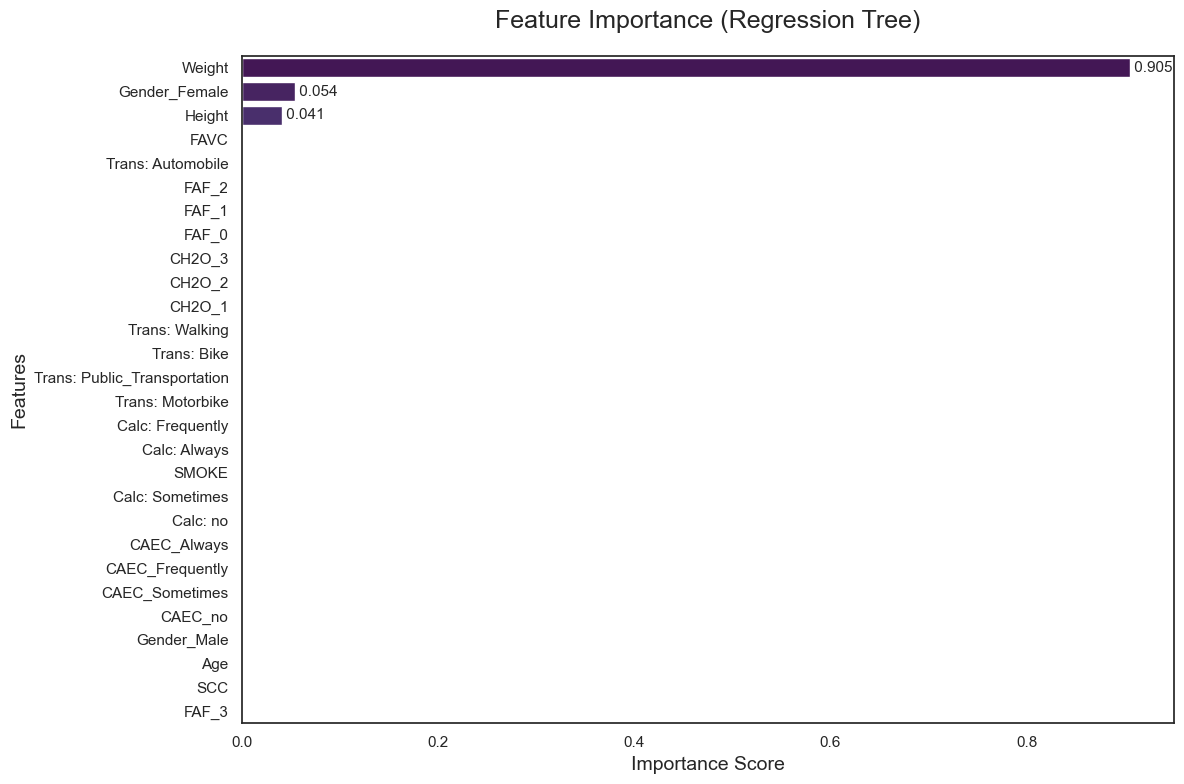

In [48]:
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': clean_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title("Feature Importance (Regression Tree)", fontsize=18, pad=20)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)

for index, value in enumerate(feature_imp_df['Importance']):
    if value > 0.001: 
        plt.text(value, index, f' {value:.3f}', va='center', fontsize=11)

plt.tight_layout()
plt.savefig("feature_importance_reg.png", dpi=300, bbox_inches='tight')
plt.show()

Total Number of Nodes: 187
=== Model Performance ===
Test Accuracy: 0.9426

=== Confusion Matrix ===
[[50  3  0  0  0  0  0]
 [ 0 52  5  0  0  0  0]
 [ 0  4 49  2  0  0  0]
 [ 0  0  1 55  2  0  0]
 [ 0  0  0  0 66  4  0]
 [ 0  0  0  0  3 57  0]
 [ 0  0  0  0  0  0 65]]
Total Number of Nodes: 187


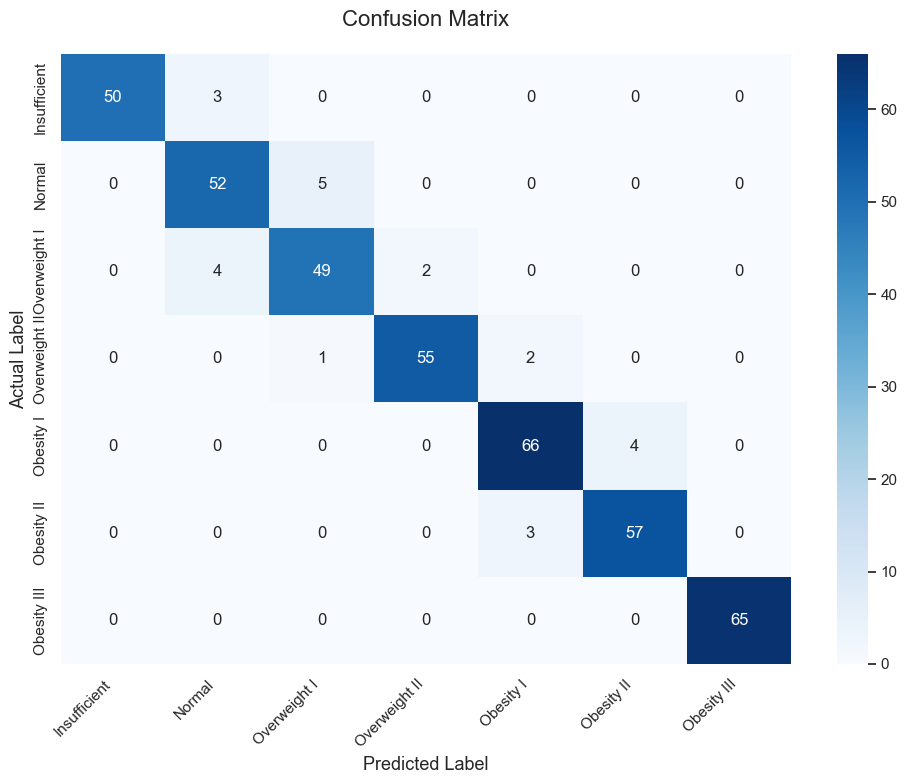

In [49]:
clf = DecisionTreeClassifier(random_state=123) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Total Number of Nodes: {clf.tree_.node_count}")
print("=== Model Performance ===")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print(f"Total Number of Nodes: {clf.tree_.node_count}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
            annot=True,                
            fmt='d',                   
            cmap='Blues',              
            xticklabels=class_labels,  
            yticklabels=class_labels)

plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)
plt.title('Confusion Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')   
plt.tight_layout()
plt.savefig("cm_class.png", dpi=300, bbox_inches='tight')
plt.show()
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': clean_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
df1=feature_imp_df

Total Number of Nodes: 177
=== Model Performance ===
Test Accuracy: 0.9593

=== Confusion Matrix ===
[[50  3  0  0  0  0  0]
 [ 0 54  3  0  0  0  0]
 [ 0  1 53  1  0  0  0]
 [ 0  0  1 54  3  0  0]
 [ 0  0  0  0 69  1  0]
 [ 0  0  0  0  3 56  1]
 [ 0  0  0  0  0  0 65]]
R² Score 0.9897
RMSE: 0.0407


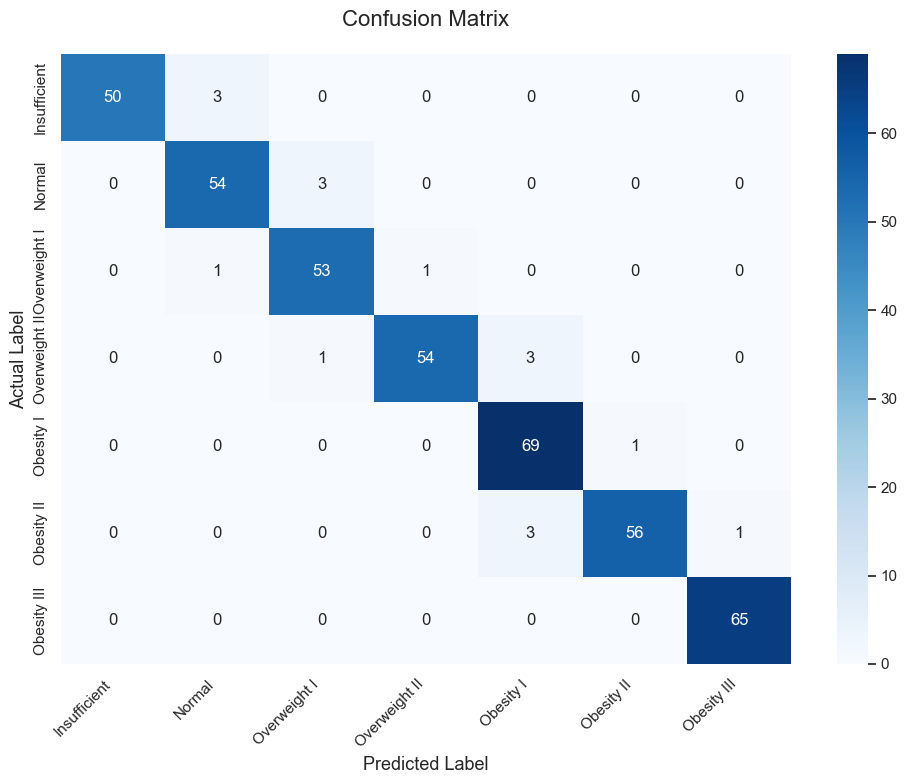

In [50]:
clf = DecisionTreeRegressor(random_state=123) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Total Number of Nodes: {clf.tree_.node_count}")
print("=== Model Performance ===")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print(f"R² Score {r2_score(y_test, y_pred):.4f}") 
print(f"RMSE: {mean_squared_error(y_test, y_pred):.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
            annot=True,                
            fmt='d',                   
            cmap='Blues',              
            xticklabels=class_labels,  
            yticklabels=class_labels)

plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)
plt.title('Confusion Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')    
plt.tight_layout()
plt.savefig("cm_reg.png", dpi=300, bbox_inches='tight')
plt.show()

importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': clean_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
df2=feature_imp_df

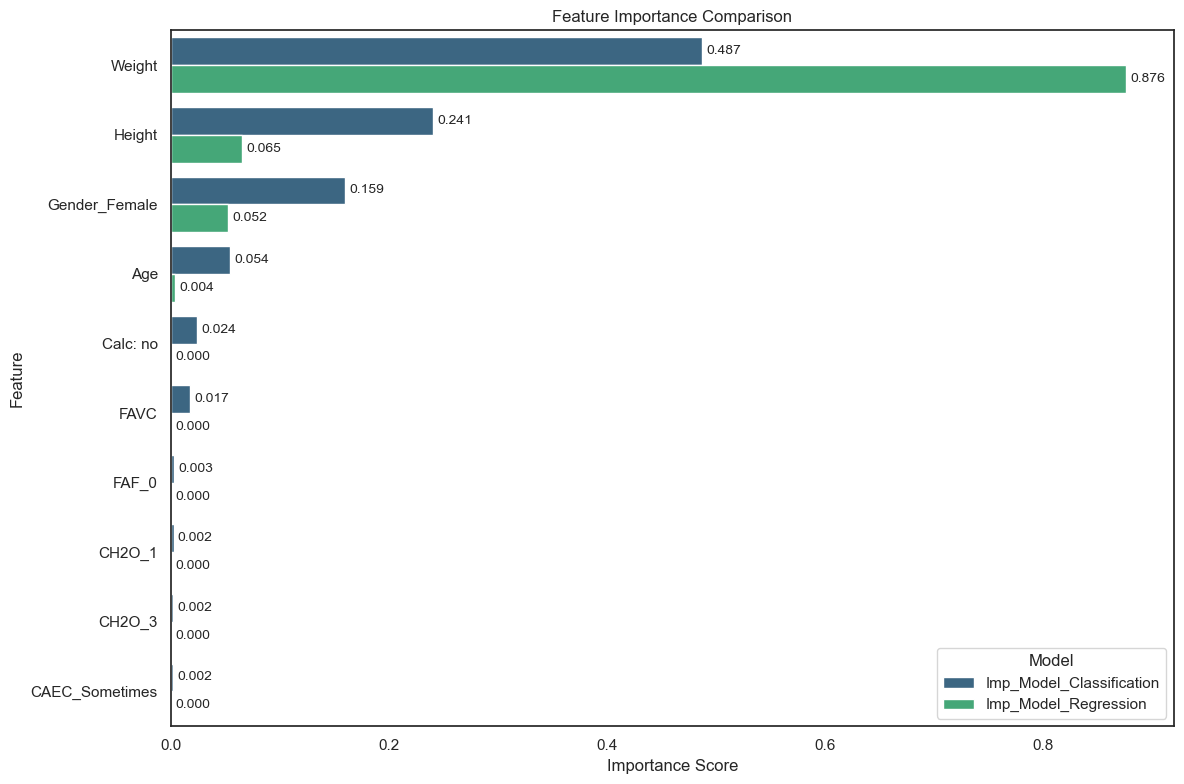

In [51]:
df1 = df1.rename(columns={'Importance': 'Imp_Model_Classification'})
df2 = df2.rename(columns={'Importance': 'Imp_Model_Regression'})

df_merged = pd.merge(df1, df2, on='Feature', how='outer').fillna(0)
df_merged['Total_Imp'] = df_merged['Imp_Model_Classification'] + df_merged['Imp_Model_Regression']
df_merged = df_merged.sort_values('Total_Imp', ascending=False).head(10)
df_long = df_merged.melt(id_vars='Feature', 
                         value_vars=['Imp_Model_Classification', 'Imp_Model_Regression'], 
                         var_name='Model', 
                         value_name='Importance')

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_long, x='Importance', y='Feature', hue='Model', palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10)
plt.title('Feature Importance Comparison')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig("Importance_best.png", dpi=300, bbox_inches='tight')
plt.show()